In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import itertools
from sklearn.metrics import  mean_squared_error
import statsmodels.api as sm
from sklearn import metrics
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Rose Wine Sales Analysis and Forecast in the 20th century

##Ans 1

In [ ]:
Path=('/content/drive/MyDrive/Rose.csv')
DF = pd.read_csv(Path)

In [ ]:
DF.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [ ]:
DF.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [ ]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [ ]:
DF['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])

In [ ]:
Rose_Data = DF.set_index('Time_Stamp')

In [ ]:
Rose_Data.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [ ]:
Rose_Data.drop(labels='YearMonth',axis=1,inplace=True)
Rose_Data.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

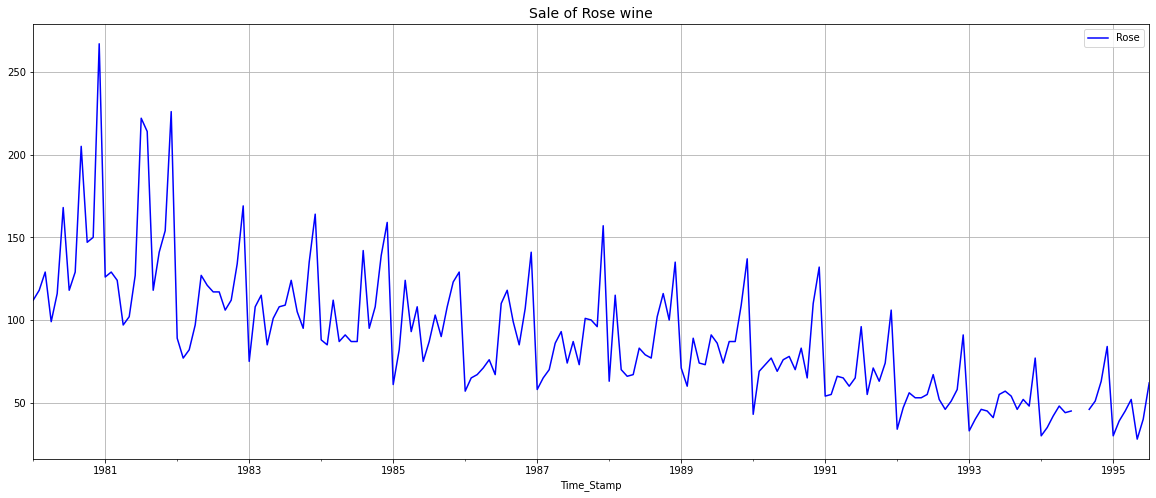

In [ ]:
#Plotting the data

Rose_Data.plot(figsize=(20,8),color='blue')
plt.title('Sale of Rose wine', fontsize=14)
plt.grid();

###Here from the plot I can see a decreasing trend in the data for sales of Rose Wine.

##Ans 2

In [ ]:
Rose_Data.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

###From above table I can see that the mean value is 90.39 and median value is 86. 

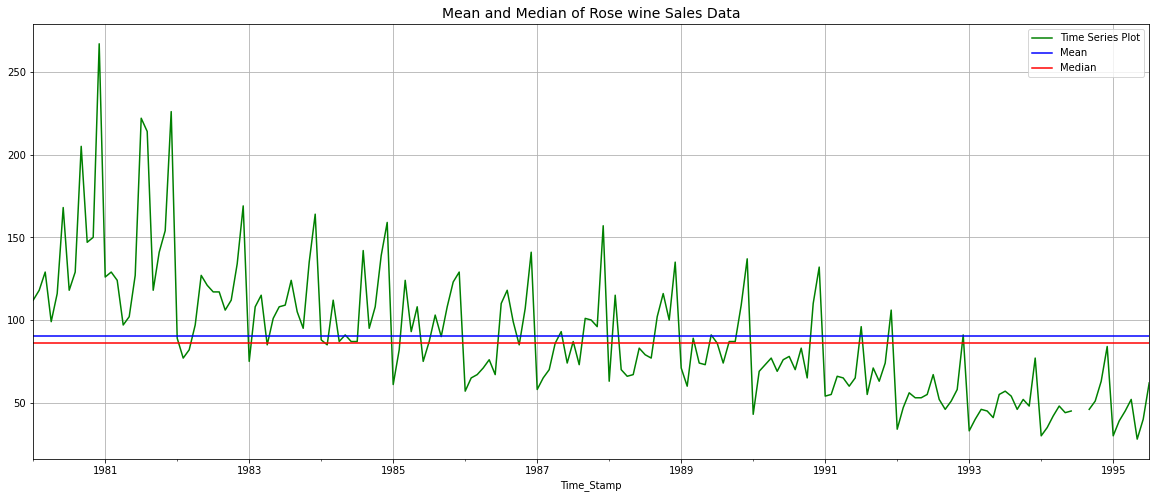

In [ ]:
#Visualizing mean and median of Rose wine sales through plot

Rose_Data.plot(color='Green',figsize=(20,8))
plt.axhline(Rose_Data['Rose'].mean(),color='Blue')
plt.axhline(Rose_Data['Rose'].median(),color='Red')
plt.title('Mean and Median of Rose wine Sales Data', fontsize=14)
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

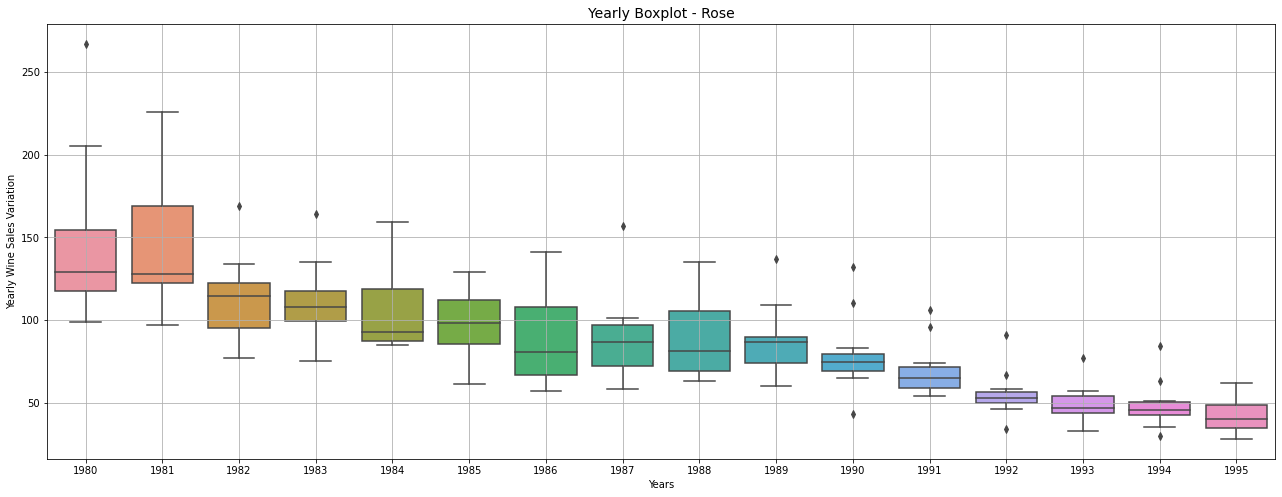

In [ ]:
#Plotting a year boxplot for the Rose wine sales

_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Rose_Data.index.year,y = Rose_Data['Rose'],ax=ax)
plt.title('Yearly Boxplot - Rose', fontsize=14)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales Variation');

###As we got to know from the Time Series plot, the boxplots over here also indicate a measure of trend being present. Also, I see that the sales of Rose wine have some outliers for certain years. Here also I can see a decreasing trend over the years and I can see that in the year 1981 the sale for Rose wine is the highest.

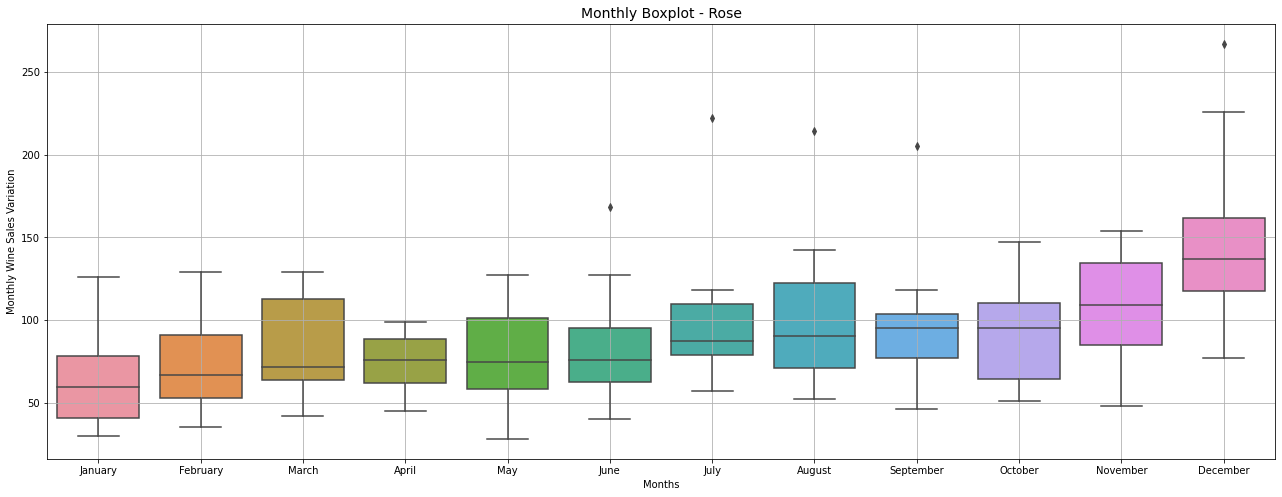

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Rose_Data.index.month_name(),y = Rose_Data['Rose'],ax=ax)
plt.grid();
plt.title('Monthly Boxplot - Rose', fontsize=14)
plt.xlabel('Months');
plt.ylabel('Monthly Wine Sales Variation');

###Here I can see from the above plot irrespective of the years in the month of December the sale for Rose wine is the highest.

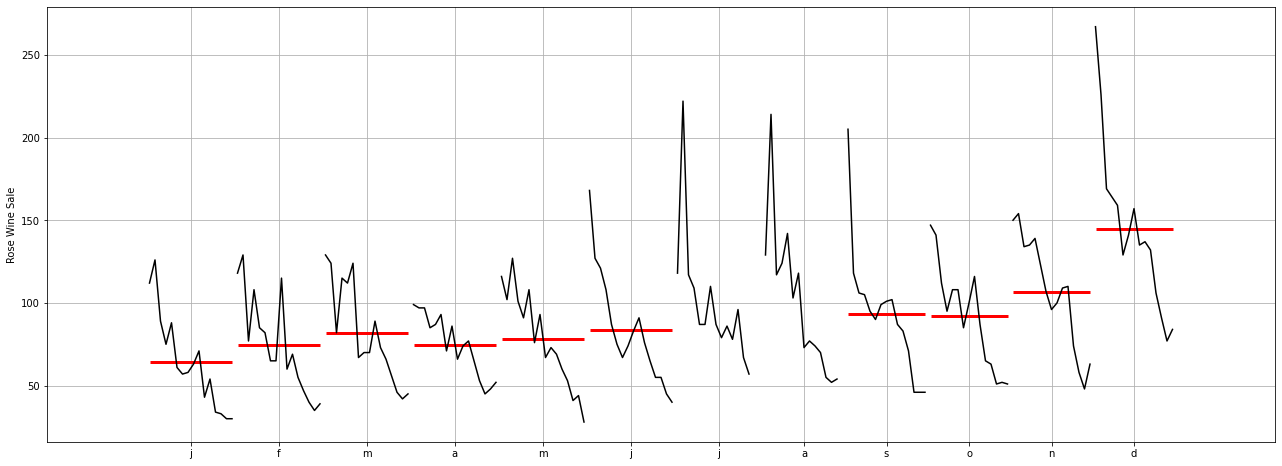

In [ ]:
#Plotting a monthplot of the give Time Series.

from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(Rose_Data,ylabel='Rose Wine Sale',ax=ax)
plt.grid();

###This plot shows us the behaviour of the Time Series ('Rose' in this case) across various months. The red line is the median value.

In [ ]:
#Plotting the Time Series according to different months for different years

yearly_sales_across_months = pd.pivot_table(Rose_Data, values = 'Rose', columns = Rose_Data.index.month, 
                                        index = Rose_Data.index.year)

yearly_sales_across_months

Time_Stamp     1      2      3     4      5      6      7      8      9   \
Time_Stamp                                                                 
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.0  117.0  106.0   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.0  142.0   95.0   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.0  103.0   90.0   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.0  118.0   99.0   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.0   73.0  101.0   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.0   77.0  102.0   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.0   74.0   87.0   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.0   70.0   83.0   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.0   55.0   71.0   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.0   52.0   46.0   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.0   54.0   46.0   
1994         30.0   35.0   42.0  48.0   44.0   45.0    NaN    NaN   46.0   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.0    NaN    NaN   

Time_Stamp     10     11     12  
Time_Stamp                       
1980        147.0  150.0  267.0  
1981        141.0  154.0  226.0  
1982        112.0  134.0  169.0  
1983         95.0  135.0  164.0  
1984        108.0  139.0  159.0  
1985        108.0  123.0  129.0  
1986         85.0  107.0  141.0  
1987        100.0   96.0  157.0  
1988        116.0  100.0  135.0  
1989         87.0  109.0  137.0  
1990         65.0  110.0  132.0  
1991         63.0   74.0  106.0  
1992         51.0   58.0   91.0  
1993         52.0   48.0   77.0  
1994         51.0   63.0   84.0  
1995          NaN    NaN    NaN

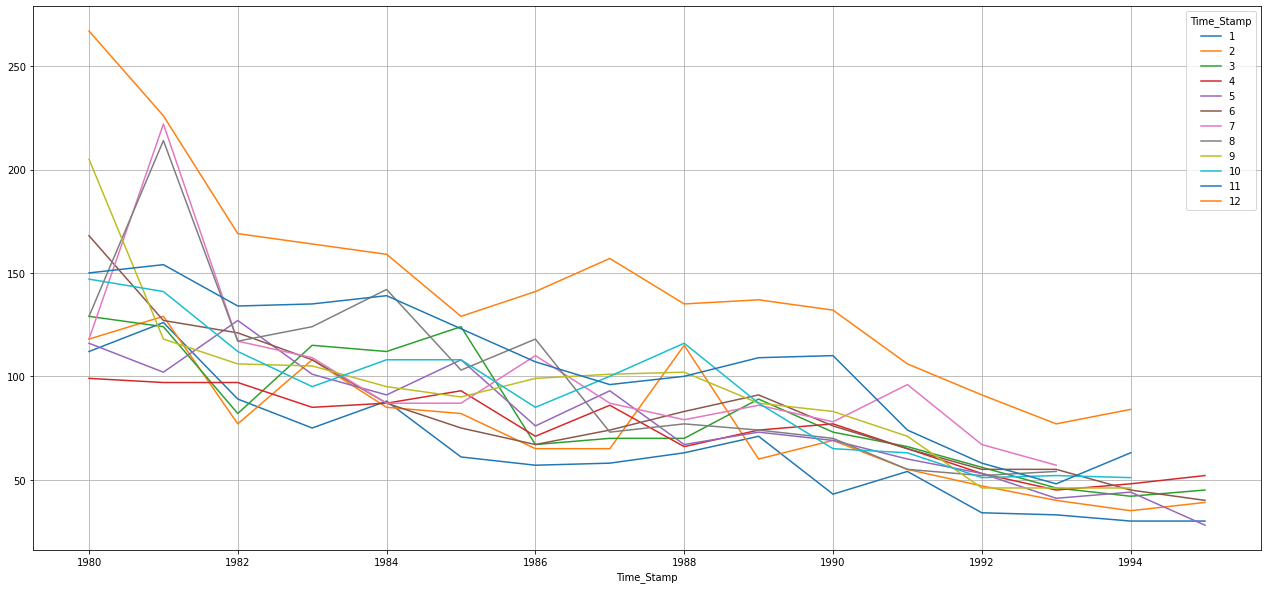

In [ ]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

###Here also I can see that irrespective of years in the month December the sales for Rose wine is the highest. 

In [ ]:
#Yearly Plot
#Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

df_yearly_sum = Rose_Data.resample('A').sum()
df_yearly_sum.head()

Rose
Time_Stamp        
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

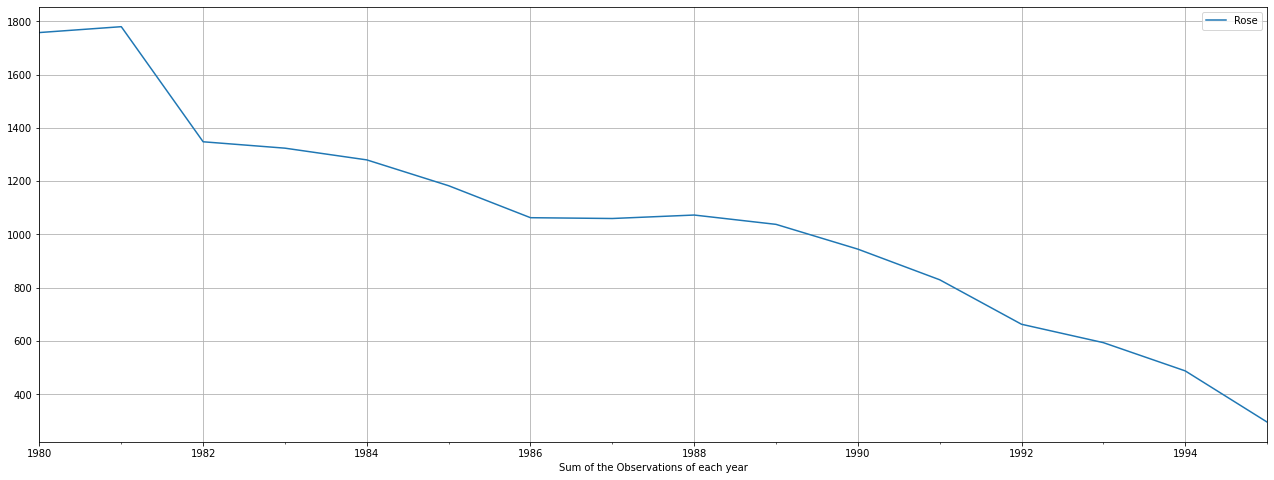

In [ ]:
df_yearly_sum.plot(figsize=(22,8));
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [ ]:
#Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation

df_yearly_mean = Rose_Data.resample('Y').mean()
df_yearly_mean.head()

Rose
Time_Stamp            
1980-12-31  146.500000
1981-12-31  148.333333
1982-12-31  112.333333
1983-12-31  110.333333
1984-12-31  106.666667

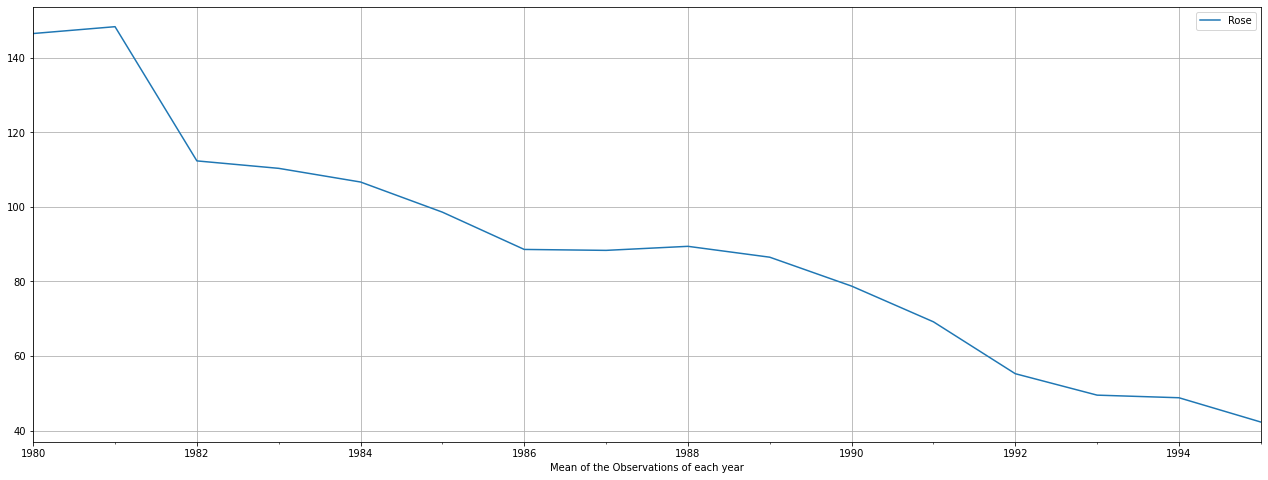

In [ ]:
df_yearly_mean.plot(figsize=(22,8));
plt.grid()
plt.xlabel('Mean of the Observations of each year');

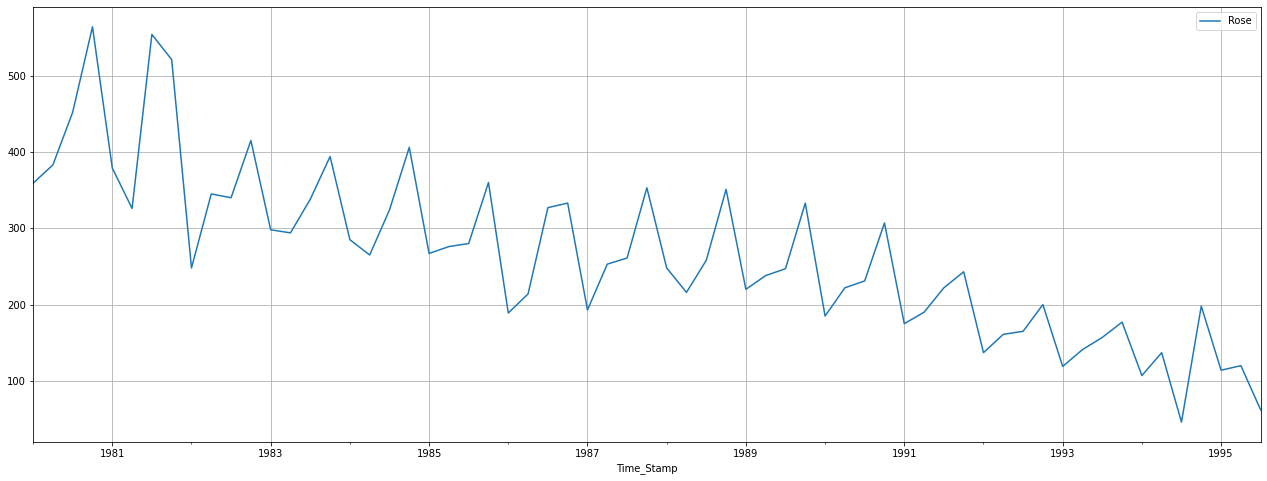

In [ ]:
#Quarterly Plot

df_quarterly_sum = Rose_Data.resample('Q').sum()
df_quarterly_sum.plot(figsize=(22,8));
plt.grid()

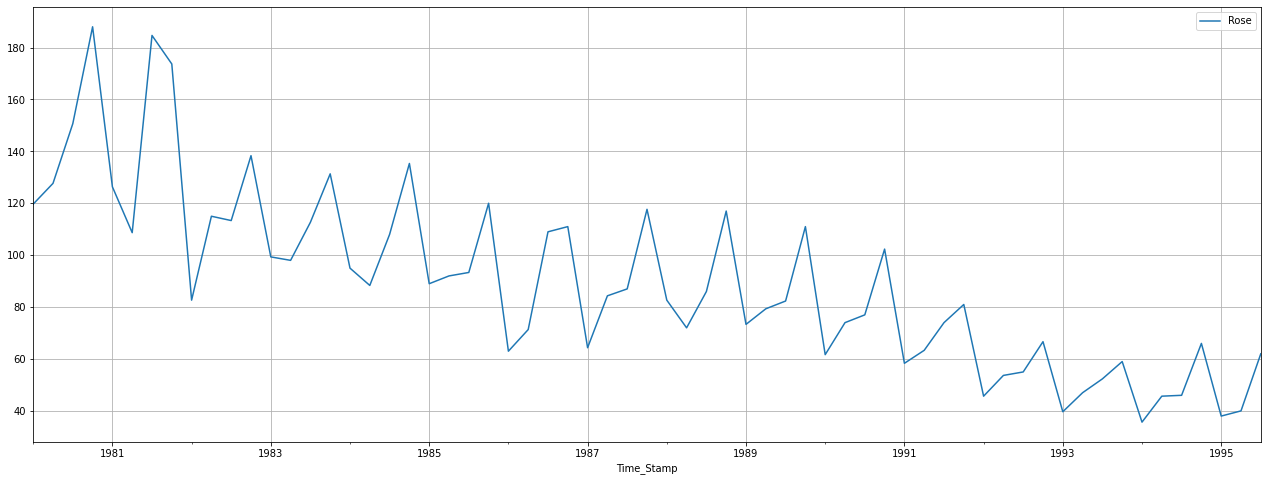

In [ ]:
df_quarterly_mean = Rose_Data.resample('Q').mean()
df_quarterly_mean.plot(figsize=(22,8));
plt.grid()

###The quarterly series is able to catch the seasonality in the data.

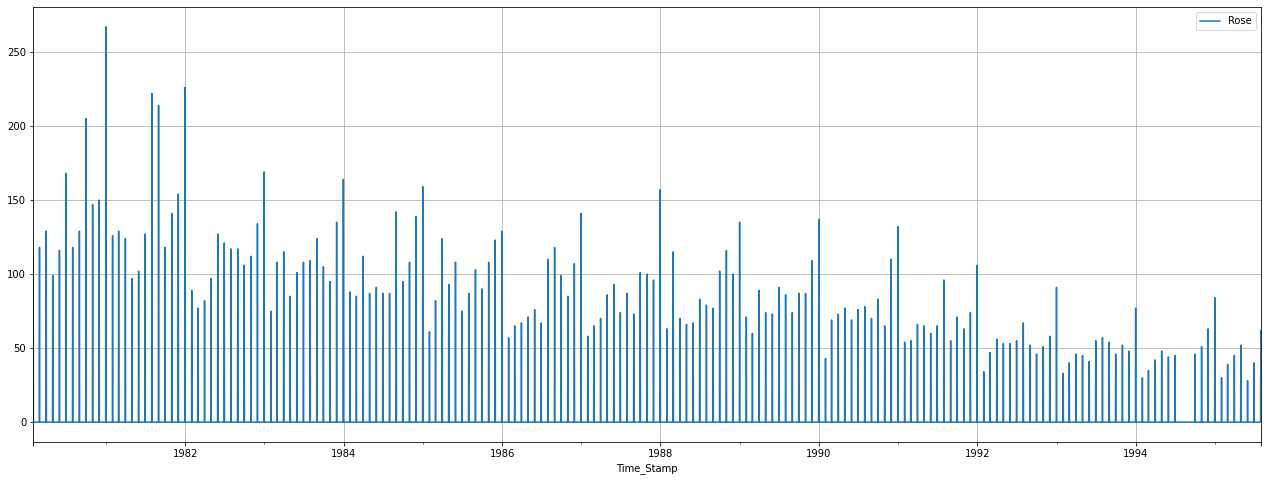

In [ ]:
#Daily Plot
#Let us try to understand the data from a daily perspective.

df_daily_sum = Rose_Data.resample('D').sum()
df_daily_sum.plot(figsize=(22,8))
plt.grid();


###While from the above plot the analysis is not much clear let’s plot the time series on decade perspective.

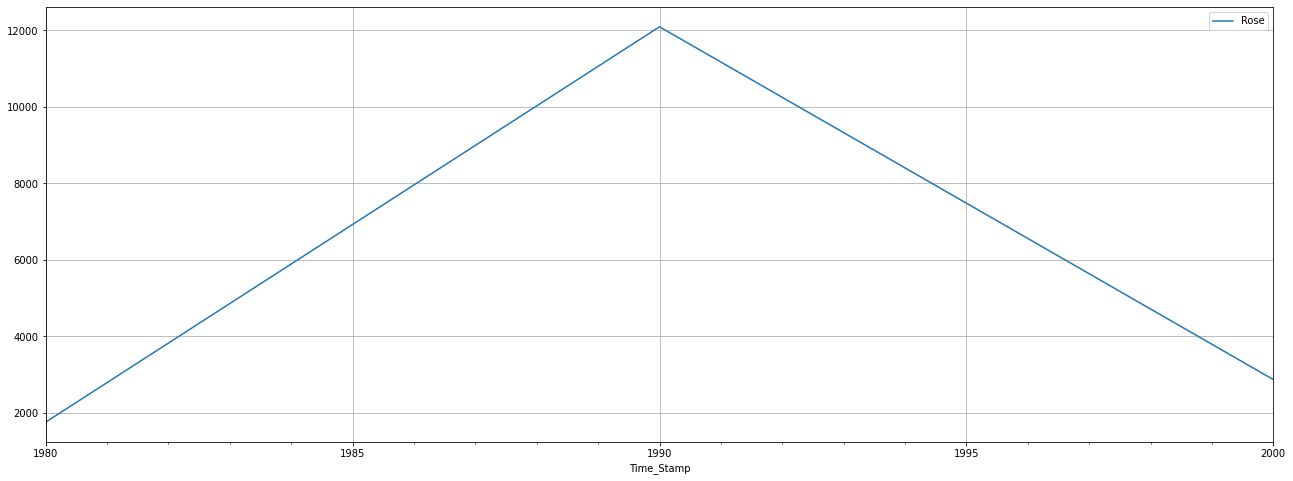

In [ ]:
#Decade Plot

df_decade_sum = Rose_Data.resample('10Y').sum()
df_decade_sum.plot(figsize=(22,8));
plt.grid();

###Decomposition

###Additive

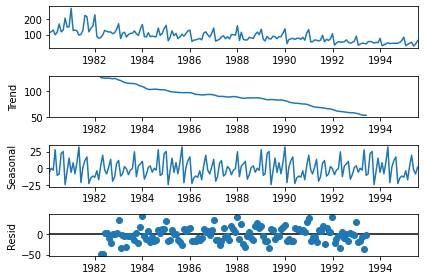

In [ ]:
#Decomposing the Data

Rose_Data.interpolate(inplace=True)
res=sm.tsa.seasonal_decompose(Rose_Data,freq=52)
resplot=res.plot()

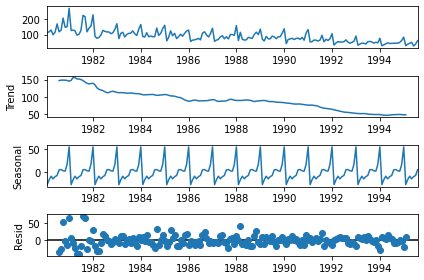

In [ ]:
decomposition = seasonal_decompose(Rose_Data,model='additive')
decomposition.plot();

###As per the 'additive' decomposition, we see that there is a negative trend in the  years of the data. There is a seasonality as well.

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [ ]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16

In [ ]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    113.103092
1980-08-31    123.500314
1980-09-30    202.225314
1980-10-31    145.128092
1980-11-30    133.153092
1980-12-31    211.286425
dtype: float64

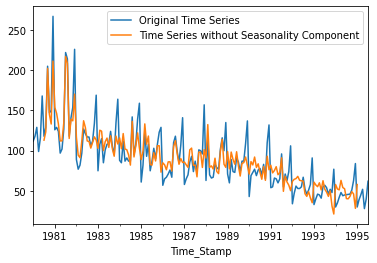

In [ ]:
Rose_Data.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", 
            "Time Series without Seasonality Component"]);

###Multiplicative

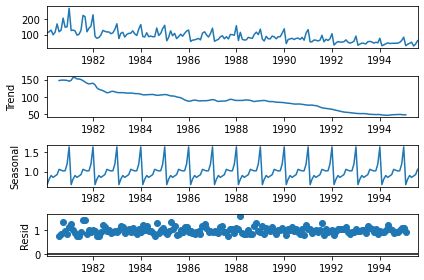

In [ ]:
Decomposition = seasonal_decompose(Rose_Data,model='multiplicative')
Decomposition.plot();

###For the multiplicative series, I can see that a lot of residuals are located around 1.


In [ ]:
trend = Decomposition.trend
seasonality = Decomposition.seasonal
residual = Decomposition.resid

In [ ]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

In [ ]:
Deaseasonalized_ts = trend + residual
Deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.841592
1980-08-31    148.965720
1980-09-30    149.732674
1980-10-31    149.054104
1980-11-30    148.270045
1980-12-31    146.254646
dtype: float64

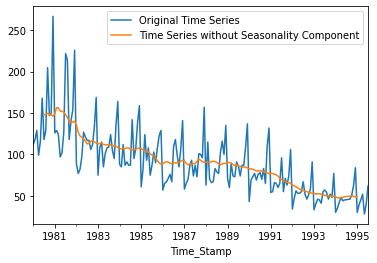

In [ ]:
Rose_Data.plot()
Deaseasonalized_ts.plot()
plt.legend(["Original Time Series", 
            "Time Series without Seasonality Component"]);

In [ ]:
#Checking Missing Values
Rose_Data.isnull().sum()

Rose    0
dtype: int64

##Ans 3

In [ ]:
train=Rose_Data[Rose_Data.index.year < 1991]
test=Rose_Data[Rose_Data.index.year >= 1991]

In [ ]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


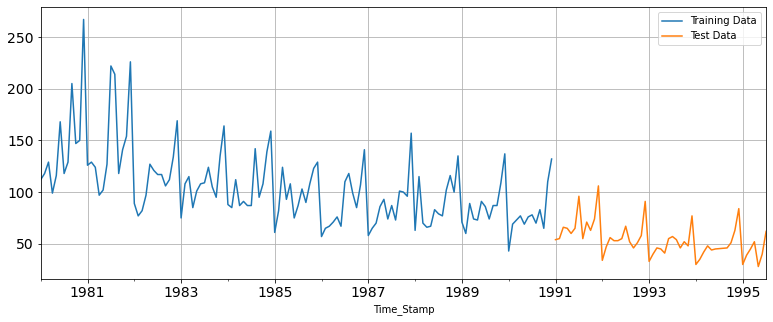

In [ ]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show();

In [ ]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

###As per the query I can see here the test data is starting from 1991

##Ans 4

###Model 1 - Linear Regression

In [ ]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


###I can see that I have successfully the generated the numerical time instance order for both the training and test set. Now I will add these values in the training and test set.

In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0    43
1991-02-28  55.0    44
1991-03-31  66.0    45
1991-04-30  65.0    46
1991-05-31  60.0    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0    93
1995-04-30  52.0    94
1995-05-31  28.0    95
1995-06-30  40.0    96
1995-07-31  62.0    97 



In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

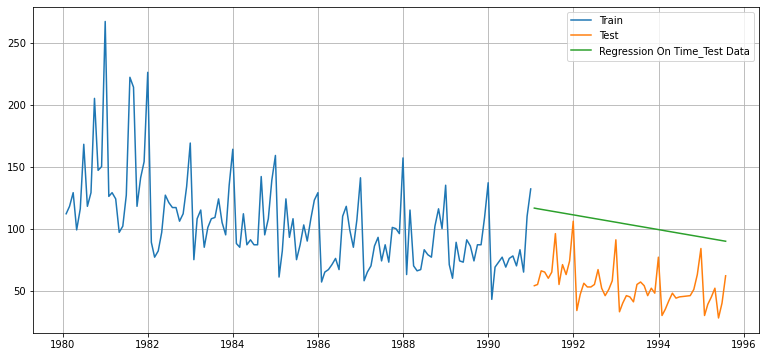

In [ ]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [ ]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.433


In [ ]:
ResultsDf = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
ResultsDf

RMSE
RegressionOnTime  51.433312

###Model 2 - Naive Approach

In [ ]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [ ]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['Rose'].head()

Time_Stamp
1991-01-31    54.0
1991-02-28    55.0
1991-03-31    66.0
1991-04-30    65.0
1991-05-31    60.0
Name: Rose, dtype: float64

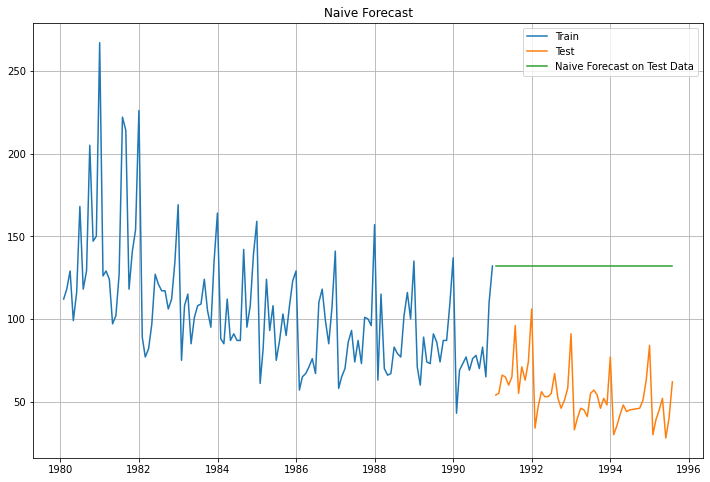

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [ ]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [ ]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])

ResultsDf = pd.concat([ResultsDf, resultsDf_2])
ResultsDf

RMSE
RegressionOnTime  51.433312
NaiveModel        79.718773

###Model 3 - Simple Average

In [ ]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

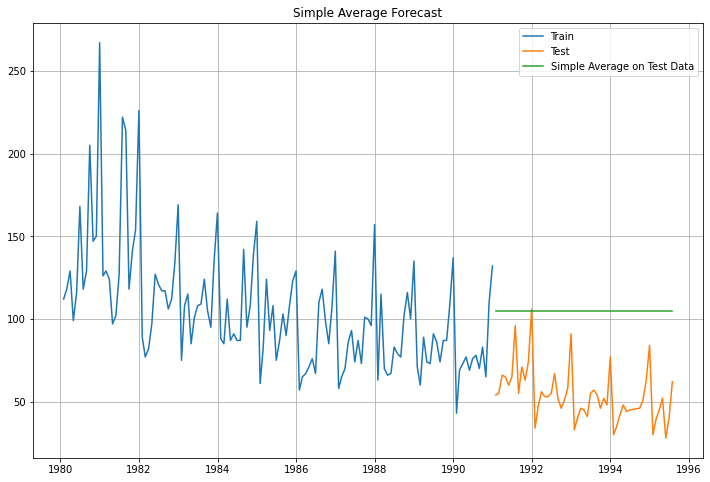

In [ ]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()

plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [ ]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [ ]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

ResultsDf = pd.concat([ResultsDf, resultsDf_3])
ResultsDf

RMSE
RegressionOnTime    51.433312
NaiveModel          79.718773
SimpleAverageModel  53.460570

###Model 4 - Moving Average

In [ ]:
MovingAverage = Rose_Data.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [ ]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

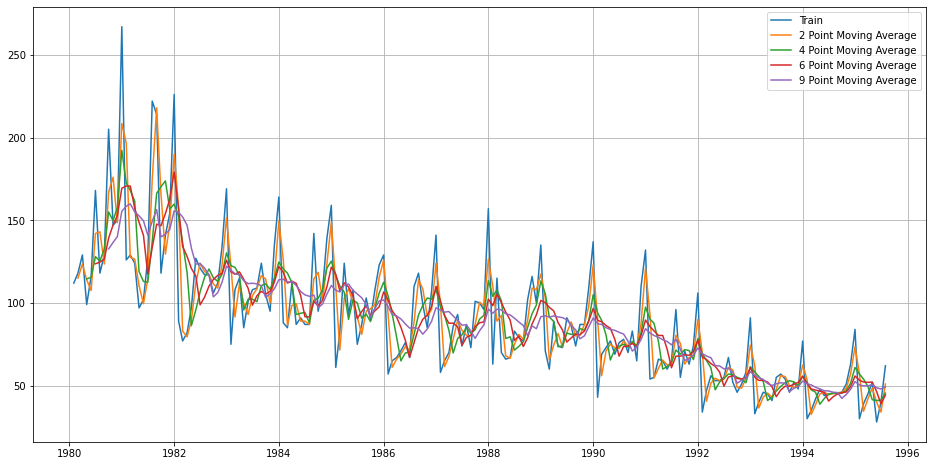

In [ ]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

###Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [ ]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

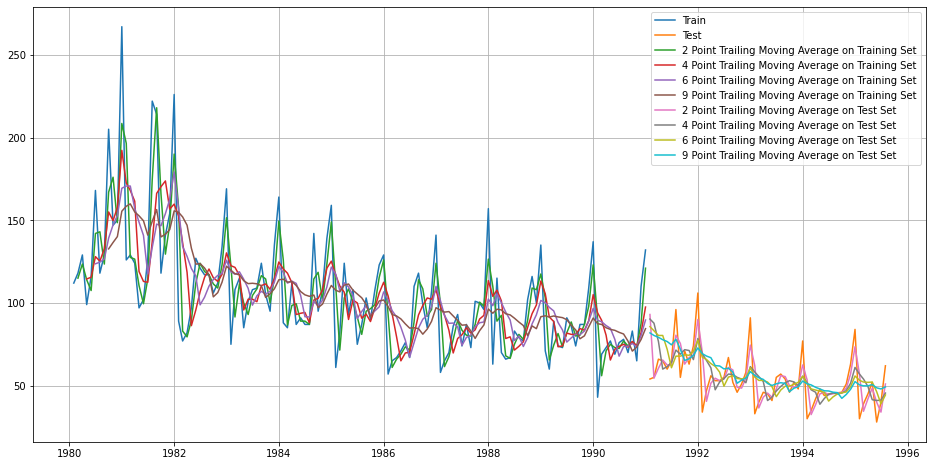

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [ ]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))


rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))


rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [ ]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

ResultsDf = pd.concat([ResultsDf, resultsDf_4])
ResultsDf

RMSE
RegressionOnTime             51.433312
NaiveModel                   79.718773
SimpleAverageModel           53.460570
2pointTrailingMovingAverage  11.529278
4pointTrailingMovingAverage  14.451403
6pointTrailingMovingAverage  14.566327
9pointTrailingMovingAverage  14.727630

###Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

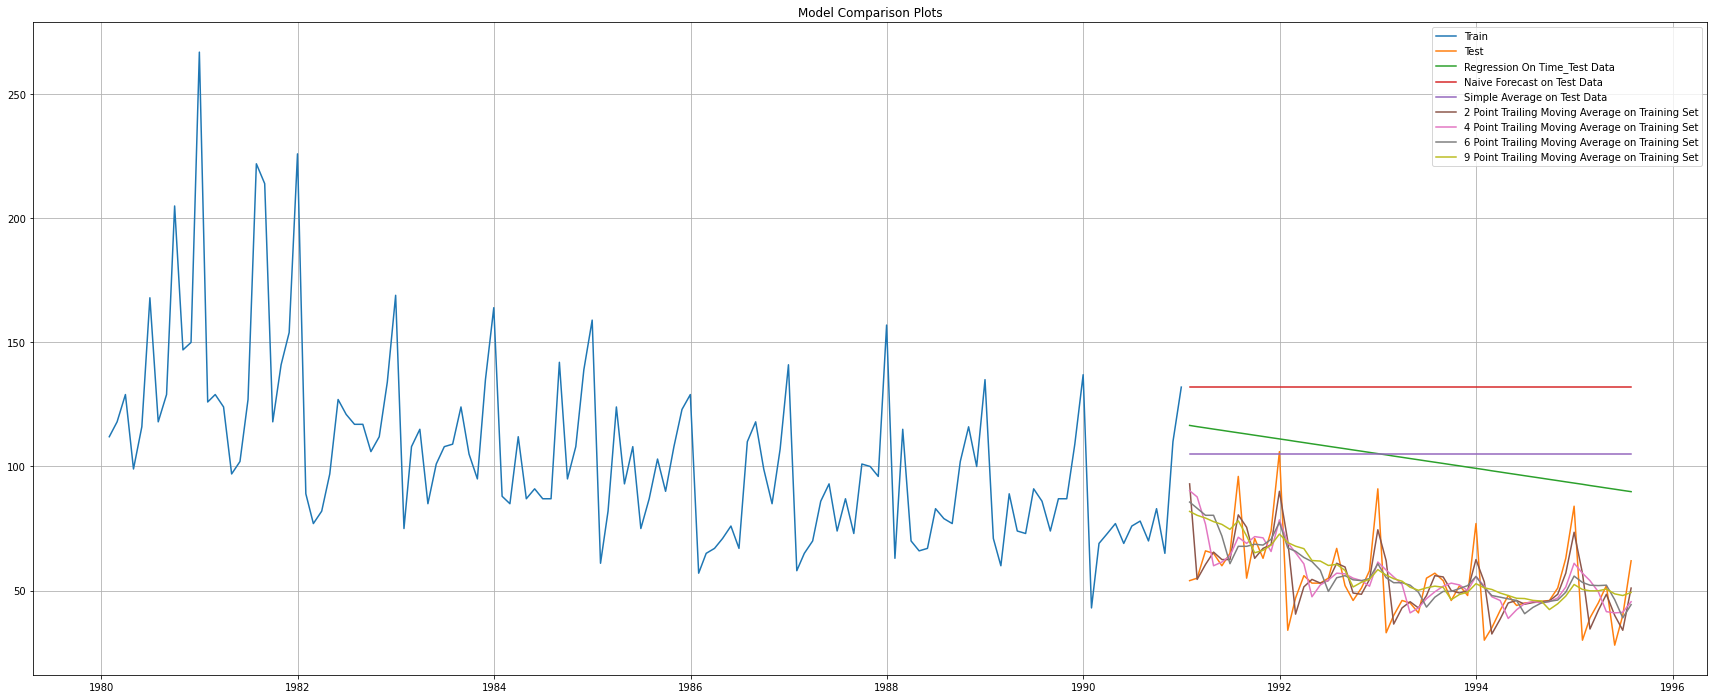

In [ ]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_9'], label='9 Point Trailing Moving Average on Training Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

###Exponential Smoothing Methods
###Model 5 - Simple Exponential Smoothing

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

In [ ]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [ ]:
model_SES_autofit = model_SES.fit(optimized=True)

In [ ]:
model_SES_autofit.params

{'smoothing_level': 0.09874989743650385,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38699692184085,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.104999
1991-02-28  55.0  87.104999
1991-03-31  66.0  87.104999
1991-04-30  65.0  87.104999
1991-05-31  60.0  87.104999

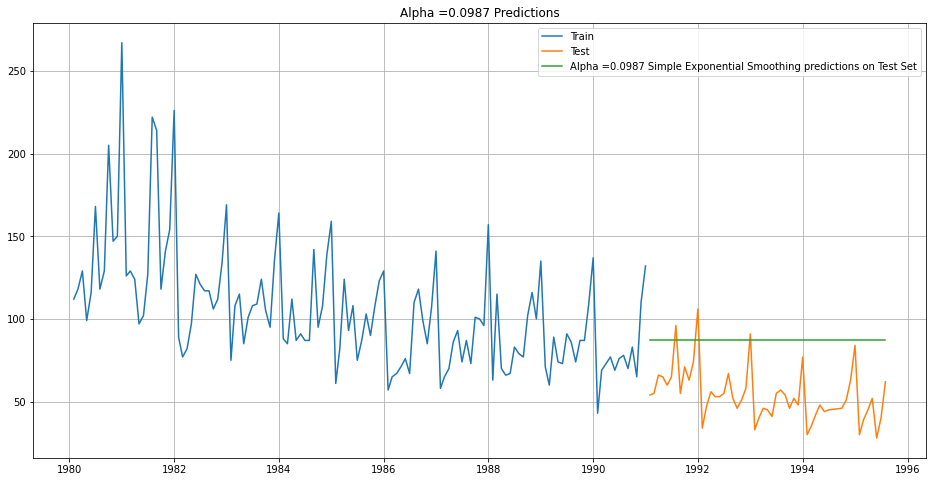

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions');

In [ ]:
##Model Evaluation for α = 0.0987 : Simple Exponential Smoothing
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [ ]:
resultsDf_5 = pd.DataFrame({'RMSE': [rmse_model5_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])

ResultsDf = pd.concat([ResultsDf, resultsDf_5])
ResultsDf

RMSE
RegressionOnTime                         51.433312
NaiveModel                               79.718773
SimpleAverageModel                       53.460570
2pointTrailingMovingAverage              11.529278
4pointTrailingMovingAverage              14.451403
6pointTrailingMovingAverage              14.566327
9pointTrailingMovingAverage              14.727630
Alpha=0.0987,SimpleExponentialSmoothing  36.796242

###Model 6 - Double Exponential Smoothing

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(DES_train['Rose'])

In [ ]:
rmse_model6 = pd.DataFrame({'Alpha':[],'Beta':[],
                            'RMSE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_rose_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_test['predict',i,j] = model_DES_rose_alpha_i_j.forecast(len(test['Rose']))
                
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        rmse_model6 = rmse_model6.append({'Alpha':i,'Beta':j,'RMSE':rmse_model6_test}, ignore_index=True)

In [ ]:
rmse_model6.sort_values(by=['RMSE']).head()

Alpha  Beta       RMSE
0     0.1   0.1  37.057143
1     0.1   0.2  48.807170
10    0.2   0.1  65.731602
2     0.1   0.3  78.209659
20    0.3   0.1  98.653317

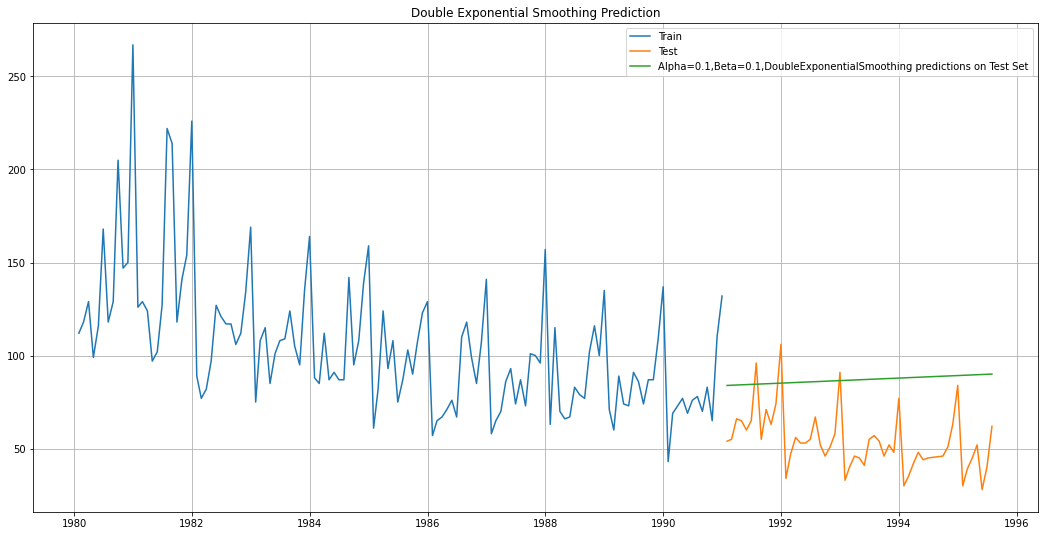

In [ ]:
# Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();
plt.title('Double Exponential Smoothing Prediction');

In [ ]:
resultsDf_6 = pd.DataFrame({'RMSE': [rmse_model6.sort_values(by=['RMSE']).values[0][2]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])
resultsDf_6

RMSE
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  37.057143

In [ ]:
ResultsDf = pd.concat([ResultsDf, resultsDf_6])
ResultsDf

RMSE
RegressionOnTime                               51.433312
NaiveModel                                     79.718773
SimpleAverageModel                             53.460570
2pointTrailingMovingAverage                    11.529278
4pointTrailingMovingAverage                    14.451403
6pointTrailingMovingAverage                    14.566327
9pointTrailingMovingAverage                    14.727630
Alpha=0.0987,SimpleExponentialSmoothing        36.796242
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  37.057143

###Model 7 - Triple Exponential Smoothing

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [ ]:
# Fitting the model
model_TES_autofit = model_TES.fit(optimized=True)

model_TES_autofit.params

{'smoothing_level': 0.06385496671075688,
 'smoothing_trend': 0.054339412544817035,
 'smoothing_seasonal': 2.2153559567160688e-07,
 'damping_trend': nan,
 'initial_level': 52.70618108899535,
 'initial_trend': -0.3295208249140407,
 'initial_seasons': array([2.14032815, 2.42886639, 2.65328858, 2.31931542, 2.60742182,
        2.84354074, 3.12509302, 3.32298216, 3.15379088, 3.08514906,
        3.59598558, 4.96000257]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
# Forecasting using this model for the duration of the test set
TES_test['predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  56.813298
1991-02-28  55.0  64.281157
1991-03-31  66.0  70.011773
1991-04-30  65.0  61.016754
1991-05-31  60.0  68.391057

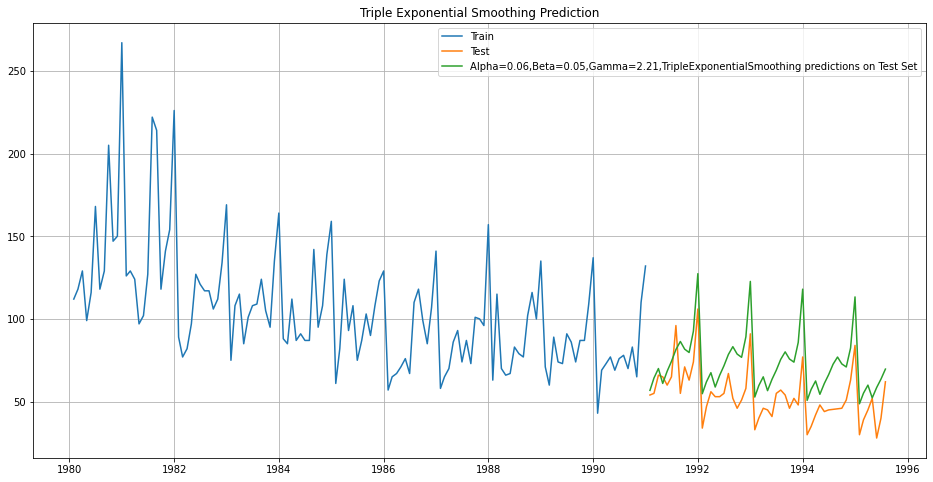

In [ ]:
# Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(16,8))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['predict'], label='Alpha=0.06,Beta=0.05,Gamma=2.21,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Prediction');

In [ ]:
##Model Evaluation : Triple Exponential Smoothing
## Test Data

rmse_model7= metrics.mean_squared_error(TES_test['Rose'],TES_test['predict'],squared=False)
print("For Alpha=0.06,Beta=0.05,Gamma=2.21 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7))

For Alpha=0.06,Beta=0.05,Gamma=2.21 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 21.255


In [ ]:
rmse_model7 = pd.DataFrame({'RMSE': [rmse_model7]},index=['Alpha=0.06,Beta=0.05,Gamma=2.21 Triple Exponential Smoothing'])

ResultsDf = pd.concat([ResultsDf, rmse_model7])
ResultsDf

RMSE
RegressionOnTime                                    51.433312
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.0987,SimpleExponentialSmoothing             36.796242
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       37.057143
Alpha=0.06,Beta=0.05,Gamma=2.21 Triple Exponent...  21.254806

##Ans 5

In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

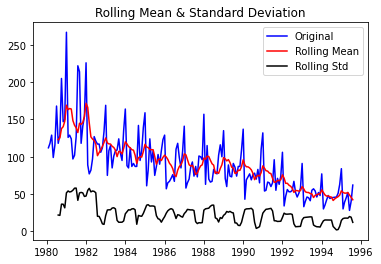

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [ ]:
test_stationarity(Rose_Data['Rose'])

###I can see that at 5% significant level the Time Series is non-stationary. Here the p value is greater than 0.05 so the time series is non-stationary.

###Let me take a difference of order 1 and check whether the Time Series is stationary or not.

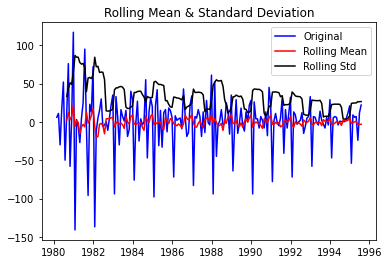

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [ ]:
test_stationarity(Rose_Data['Rose'].diff().dropna())

###Now I can see the p value is less than 0.05 it means after taking difference order 1 the time series has become Stationary.


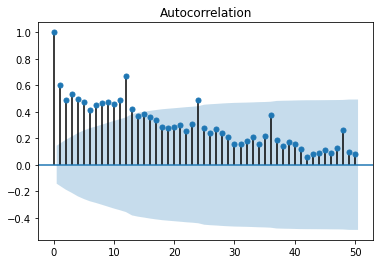

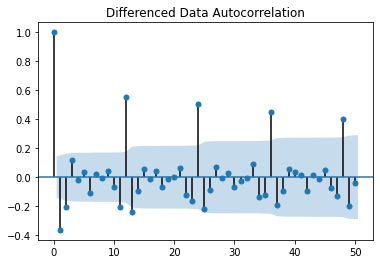

In [ ]:
###Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

plot_acf(Rose_Data['Rose'],lags=50)
plot_acf(Rose_Data['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

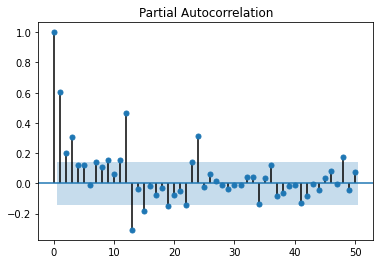

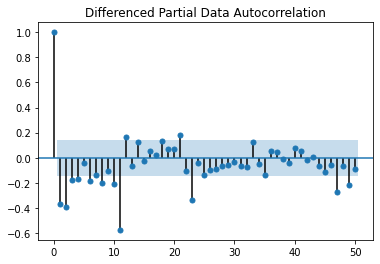

In [ ]:
plot_pacf(Rose_Data['Rose'],lags=50)
plot_pacf(Rose_Data['Rose'].diff().dropna(),lags=50,title='Differenced Partial Data Autocorrelation')
plt.show();

###From the above plots, we can say that there seems to be a seasonality in the data.

##Ans 6

###Model 8 - Auto ARIMA Model

In [ ]:
## The following loop helps me in getting a combination of different parameters of p and q in the range of 0 and 2
## I have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [ ]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464226
ARIMA(0, 1, 2) - AIC:1276.8353736830445
ARIMA(1, 1, 0) - AIC:1319.348310580327
ARIMA(1, 1, 1) - AIC:1277.7757470175518
ARIMA(1, 1, 2) - AIC:1277.3592285814816
ARIMA(2, 1, 0) - AIC:1300.6092611744011
ARIMA(2, 1, 1) - AIC:1279.0456894093136
ARIMA(2, 1, 2) - AIC:1279.2986939368204


In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835374
5  (1, 1, 2)  1277.359229
4  (1, 1, 1)  1277.775747
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

###Here I can see that the AIC value is lowest for the order combination (0,1,2) so now I will make ARIMA model with this order. As we all know that the lower the AIC value the better the model.

In [ ]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Wed, 21 Dec 2022   AIC                           1276.835
Time:                        05:06:49   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

###The above model is an AutoRegressive Integrated Moving Average model of order (0,1,2) i.e. the Time Series being regressed upon itself at a lag of 0, the errors from a lag of 2 and a lag and a degree or order differencing of 1 to make it stationary.

In [ ]:
###Predict on the Test Set using this model and evaluate the model.

predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [ ]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.618281486391918


In [ ]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf

RMSE
ARIMA(0,1,2)  15.618281

###Model 9 -Auto SARIMA Model

###Creating SARIMA model with seasonality at 12 as I have got from the ACF plot

In [ ]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207305
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380896
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386618
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635749904
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697556
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894576
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918332
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383724
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491823
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094669
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483307634
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535833
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461674
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.198826376204
SARIMA(0, 1, 2)x(0, 0, 0,

In [ ]:
SARIMA_AIC.sort_values(by='AIC',ascending=True).head(10)

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.901198
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346445
70  (2, 1, 1)  (2, 0, 1, 12)  897.639957
79  (2, 1, 2)  (2, 0, 1, 12)  898.378189
71  (2, 1, 1)  (2, 0, 2, 12)  899.483587
44  (1, 1, 1)  (2, 0, 2, 12)  900.672580
17  (0, 1, 1)  (2, 0, 2, 12)  901.198826

###Here I can see for the combination of (0,1,2) (2,0,2,12) the AIC value is the lowest so I have built SARIMA model with this combination.

In [ ]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Wed, 21 Dec 2022   AIC                            887.938
Time:                                    05:08:06   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.867     -0.004      0.996    -372.976     371.290
ma.L2         -0.1573     29.829   

In [ ]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [ ]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.928361801824764


In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0,1,2)             15.618281
SARIMA(0,1,2)(2,0,2,12)  26.928362

##Ans 7

###Model 10 - Manual ARIMA Model

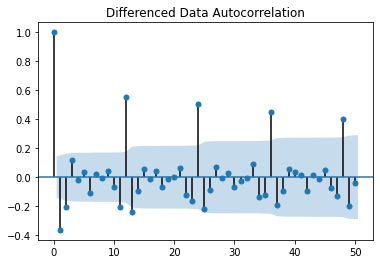

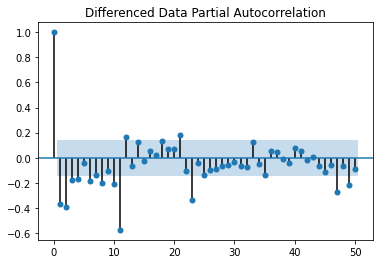

In [ ]:
plot_acf(Rose_Data['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(Rose_Data['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

###Here, we have taken alpha=0.05.

###The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
###The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.
###By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [ ]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -665.576
Method:                           css   S.D. of innovations             38.931
Date:                Wed, 21 Dec 2022   AIC                           1335.153
Time:                        05:08:23   BIC                           1340.903
Sample:                    02-29-1980   HQIC                          1337.489
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1527      3.401      0.045      0.964      -6.514       6.819


In [ ]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [ ]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

84.13301144439681


In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0,1,2)             15.618281
SARIMA(0,1,2)(2,0,2,12)  26.928362
ARIMA(0,1,0)             84.133011

###Model 11 - Manual SARIMA Model

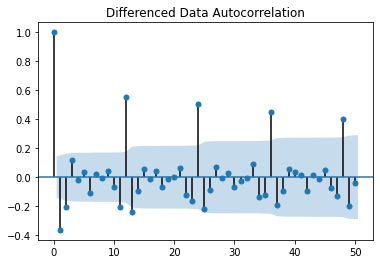

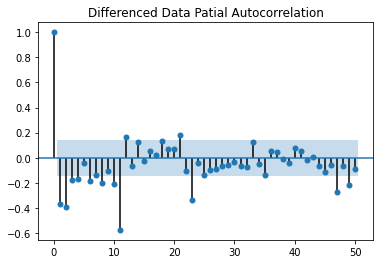

In [ ]:
plot_acf(Rose_Data['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(Rose_Data['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

###I can see that ACF plot at the seasonal interval (12) does not taper off. So, I will go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

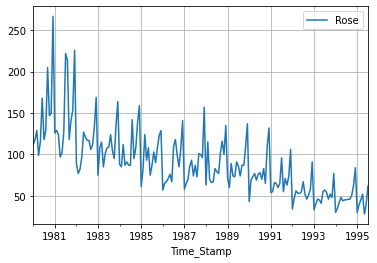

In [ ]:
Rose_Data.plot()
plt.grid();

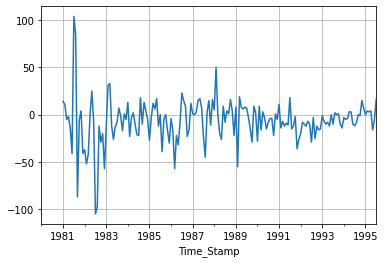

In [ ]:
(Rose_Data['Rose'].diff(12)).plot()
plt.grid();

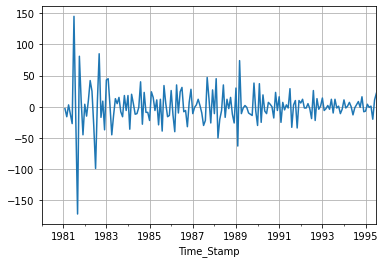

In [ ]:
(Rose_Data['Rose'].diff(12)).diff().plot()
plt.grid();

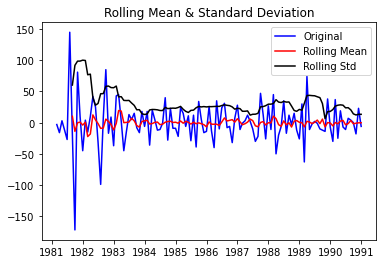

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [ ]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

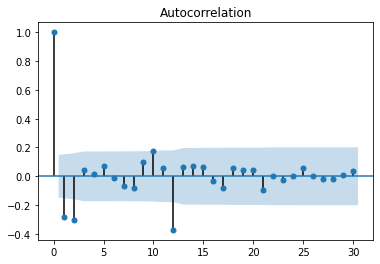

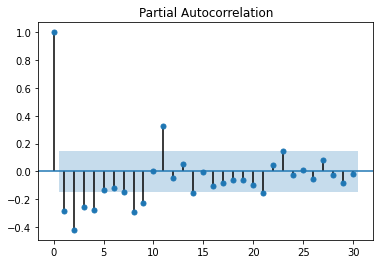

In [ ]:
#Checking the ACF and the PACF plots for the new modified Time Series.

plot_acf((Rose_Data['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((Rose_Data['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

###Let me build SARIMA model from the parameters of ACF and PACF plots.
###Here, I have taken alpha=0.05.
###I am going to take the seasonal period as 12 or its multiple e.g. 24. I am taking the p value to be 0 and the q value also to be 0 as the parameters same as the ARIMA model. The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
###The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.

In [ ]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 6, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                              SARIMAX Results                                              
Dep. Variable:                                                Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood                -205.540
Date:                                             Wed, 21 Dec 2022   AIC                            429.080
Time:                                                     05:09:55   BIC                            445.538
Sample:                                                 01-31-1980   HQIC                           435.245
                                                      - 12-31-1990                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [ ]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
print(rmse)

24.374461615825503


In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(2,1,6,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0,1,2)             15.618281
SARIMA(0,1,2)(2,0,2,12)  26.928362
ARIMA(0,1,0)             84.133011
SARIMA(0,1,0)(2,1,6,12)  24.374462

###I see that there is difference in the RMSE values for both the SARIMA models but for ARIMA models there is hardly any difference.

##Ans 8

###Lets make a table of all RMSE values for all the models I have built earlier and all the ARIMA/SARIMA models.

In [ ]:
resultsDf = pd.concat([resultsDf,ResultsDf])

resultsDf

RMSE
ARIMA(0,1,2)                                        15.618281
SARIMA(0,1,2)(2,0,2,12)                             26.928362
ARIMA(0,1,0)                                        84.133011
SARIMA(0,1,0)(2,1,6,12)                             24.374462
RegressionOnTime                                    51.433312
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.0987,SimpleExponentialSmoothing             36.796242
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       37.057143
Alpha=0.06,Beta=0.05,Gamma=2.21 Triple Exponent...  21.254806

###Among the models I can see RMSE value for 2pointTrailingMovingAverage is the lowest. This RMSE value is based on the test data. But there are other appropriate methods to predict forecast rather than taking average. I will take  SARIMA (0,1,0)(2,1,6,12) model as it has seasonality also. It will give better forecast. Now I will apply this model on the whole data and will predict a certain 12 months in future.

##Ans 9

###Most Optimum Model on the Complete Data

In [ ]:
full_data_model = sm.tsa.statespace.SARIMAX(Rose_Data['Rose'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 6, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                              SARIMAX Results                                              
Dep. Variable:                                                Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood                -419.099
Date:                                             Wed, 21 Dec 2022   AIC                            856.198
Time:                                                     05:18:37   BIC                            879.734
Sample:                                                 01-31-1980   HQIC                           865.726
                                                      - 07-31-1995                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [ ]:
rmse = mean_squared_error(Rose_Data['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 48.34981555006598


In [ ]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  43.651021  14.068972      16.076342      71.225700
1995-09-30  54.241376  19.896532      15.244890      93.237861
1995-10-31  49.669831  24.368175       1.909086      97.430576
1995-11-30  68.267863  28.137945      13.118504     123.417221
1995-12-31  93.893714  31.459179      32.234857     155.552571

In [ ]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1998-01-01',end='1998-12-31', freq='M'))

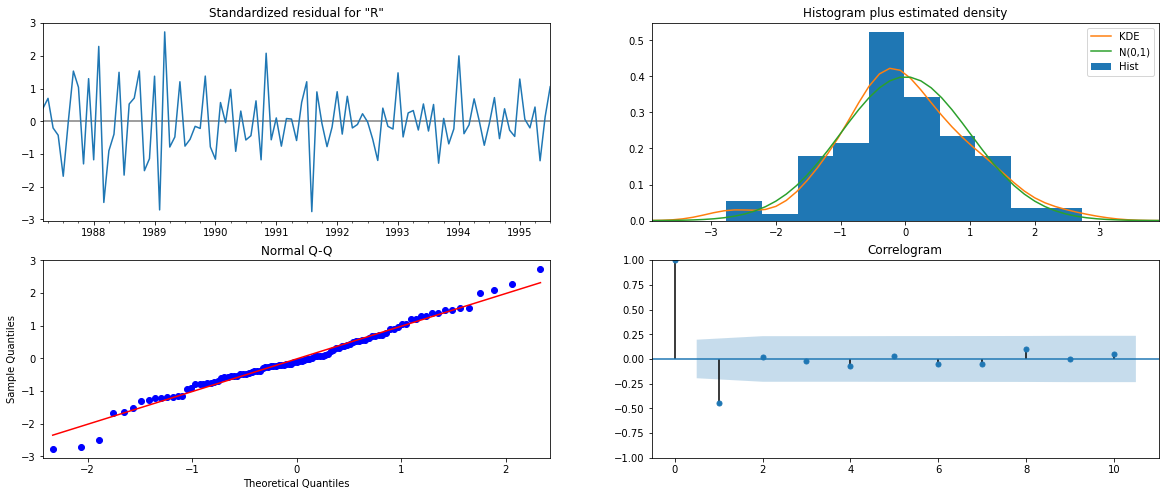

In [ ]:
plt.rcParams['figure.figsize'] = [20, 8]
results_full_data_model.plot_diagnostics();


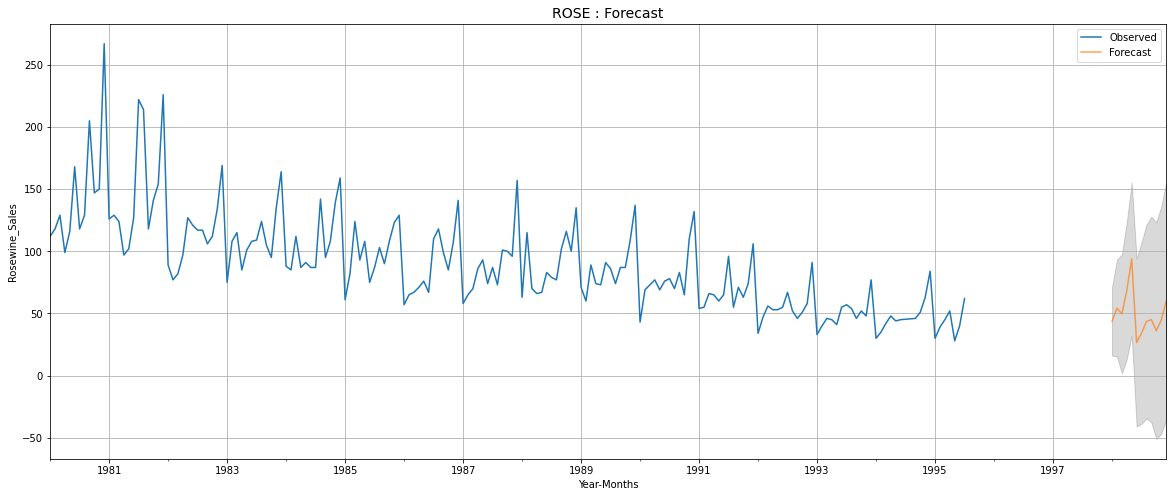

In [ ]:
axis = Rose_Data['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rosewine_Sales')
plt.legend(loc='best')
plt.title('ROSE : Forecast', fontsize=14);
plt.grid();

###Here with the time series data of previous years I have predicted the sales for Sparkling wine in the year of 1998. Here I have taken the model of SARIMA with order (0,1,0) (2,1,6,12)


##Ans 10

###For the Rose wine if I see the trend of sales from year 1980 to July,1995 then there has been constant decrease in the trend which is not good for the company. Using this trend, I have predicted the sales for the year 1998 and I have found it has remain constant like the years of 1994-95. So if ABC Estate Wines wants to improve in the sales of Rose wine then they have to look upon that.
###The company has to check why the generation after 1985 the customers are not preferring to buy Rose Wine.
###One of the main reasons of the decrease in sale can be the quality, if there is lack of quality then no one will want to buy it. So the company should check upon the quality, check the reviews of the customers. Another reason can be unavailability of the wine. Make sure there is enough production and supply of the wine in all stores of wine.
###From the plots I can see in the month December irrespective of all the years there has been remarkable sales with respect to other months. May be it is for the festive season. Winter season, Christmas Eve, Pre New Year eve these factors have been impacted on the sales. Though after checking the year plots I can see definitely in the early years like 1980-1985 the sales for December were high.
###Along with this the company has to come out with different ideas. We can not introduce new festivals in the calendar but the company may introduce new offers for the wine in the rest of the months. New offers for new customers, different offers for old loyal customers so that they become interested to buy Rose wine from the company. They can introduce different varieties but all will be in the Rose wine.


#Sparkling Wine Sales Analysis Forecast in the 20th century

##Ans 1

In [3]:
Path1=('/content/drive/MyDrive/Sparkling.csv')
df = pd.read_csv(Path1)

In [ ]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [ ]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [4]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [5]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])

In [6]:
Sparkling_Data = df.set_index('Time_Stamp')

In [7]:
Sparkling_Data.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [8]:
Sparkling_Data.drop(labels='YearMonth',axis=1,inplace=True)
Sparkling_Data.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

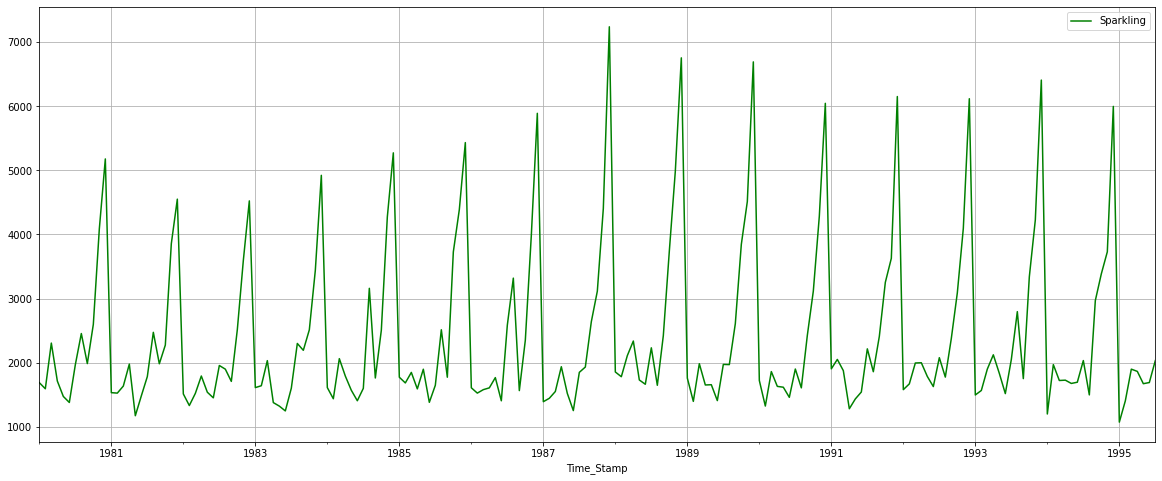

In [ ]:
#Plotting the data

Sparkling_Data.plot(figsize=(20,8), color='Green')
plt.grid();

##Ans 2

In [ ]:
Sparkling_Data.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [ ]:
#Checking Missing Values
Sparkling_Data.isnull().sum()

Sparkling    0
dtype: int64

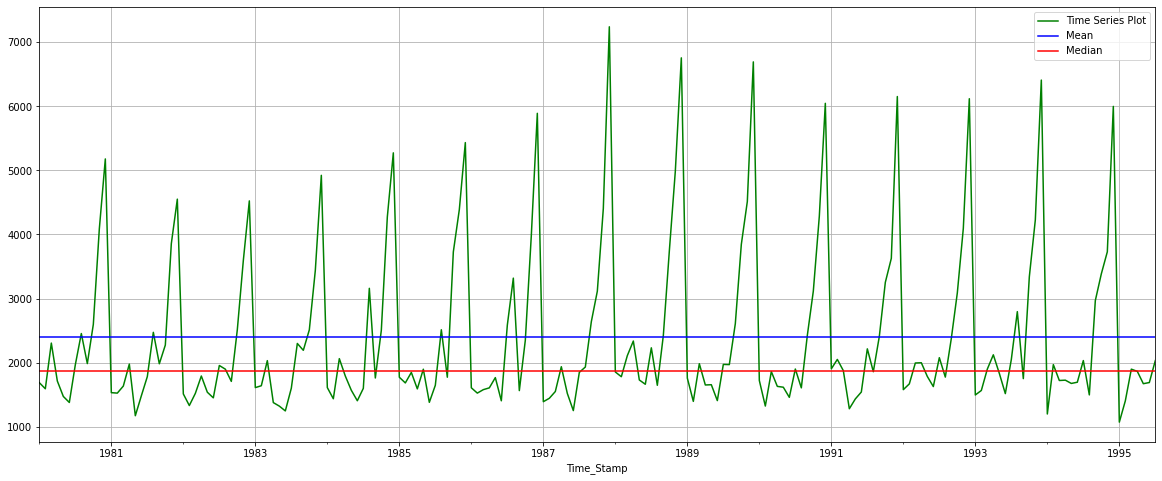

In [ ]:
#Visualizing mean and median of Sparkling wine sales through plot

Sparkling_Data.plot(color='Green',figsize=(20,8))
plt.axhline(Sparkling_Data['Sparkling'].mean(),color='Blue')
plt.axhline(Sparkling_Data['Sparkling'].median(),color='Red')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

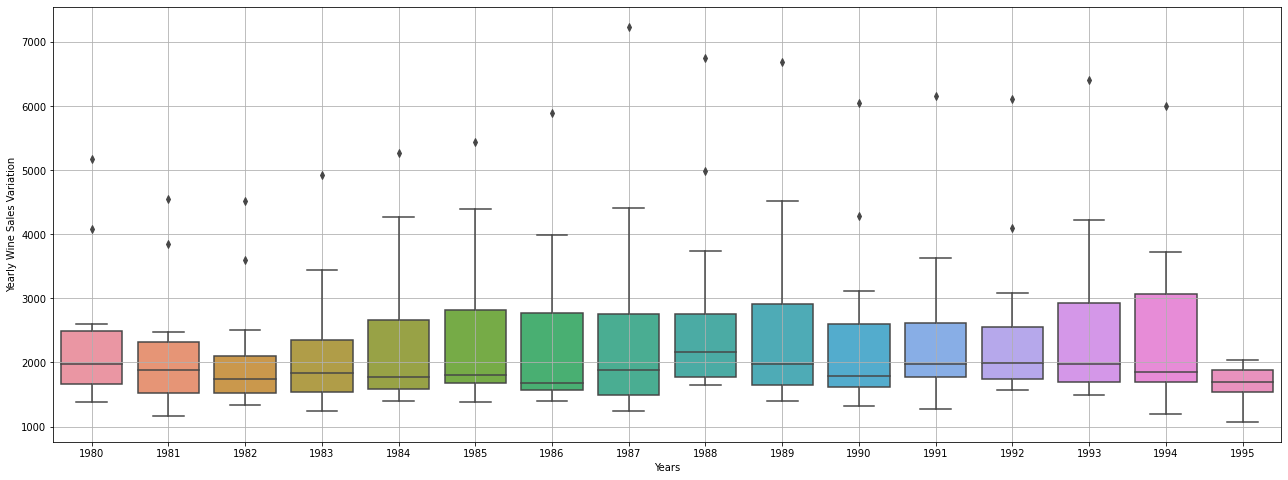

In [ ]:
#Plotting a year boxplot for the Sparkling wine sales

_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Sparkling_Data.index.year,y = Sparkling_Data.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales Variation');

###Here I can see from the above plot in the year 1994 the sale for Sparkling wine is the highest. I see that the sales of Sparkling wine have some outliers for certain years

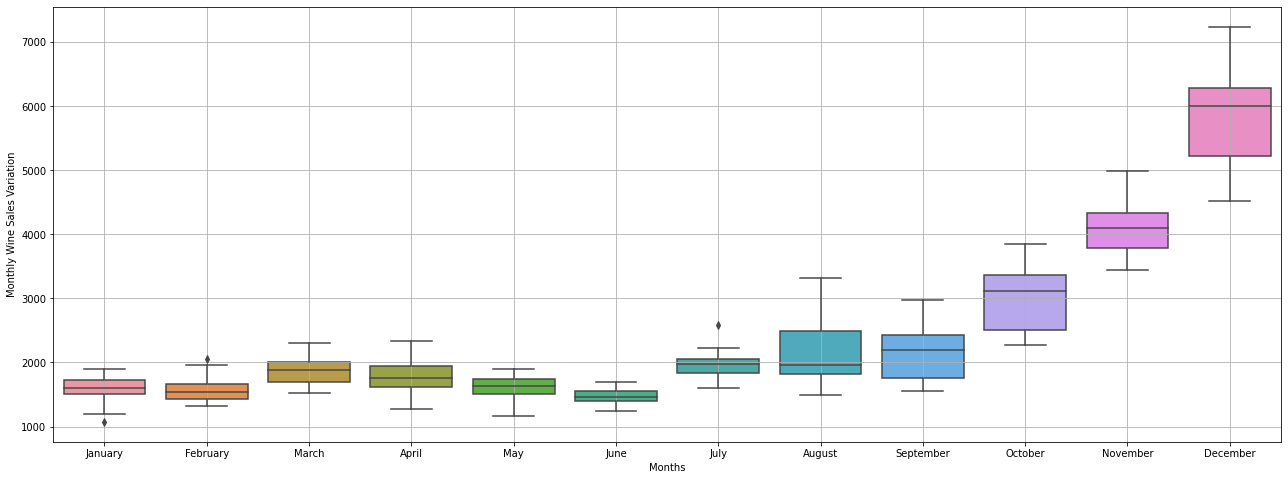

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Sparkling_Data.index.month_name(),y = Sparkling_Data.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Wine Sales Variation');

###Here I can see from the above plot irrespective of the years in the month of December the sale for Sparkling wine is the highest.

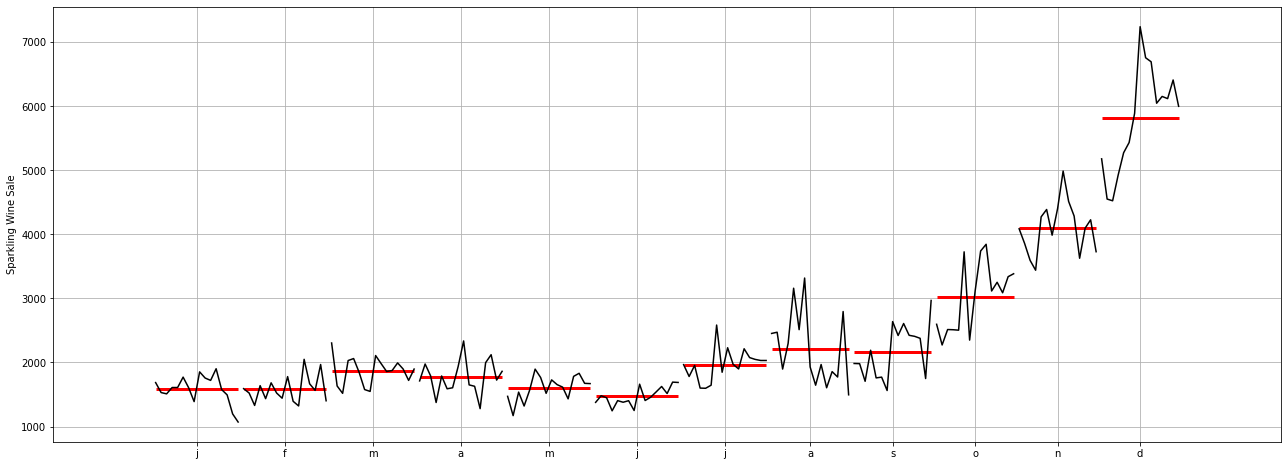

In [ ]:
#Plotting a monthplot of the given Time Series.

from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(Sparkling_Data,ylabel='Sparkling Wine Sale',ax=ax)
plt.grid();

###This plot shows us the behaviour of the Time Series ('Sparkling') in this case) across various months. The red line is the median value.

In [ ]:
#Plotting the Time Series according to different months for different years

yearly_sales_across_months = pd.pivot_table(Sparkling_Data, values = 'Sparkling', columns = Sparkling_Data.index.month, 
                                        index = Sparkling_Data.index.year)

yearly_sales_across_months

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

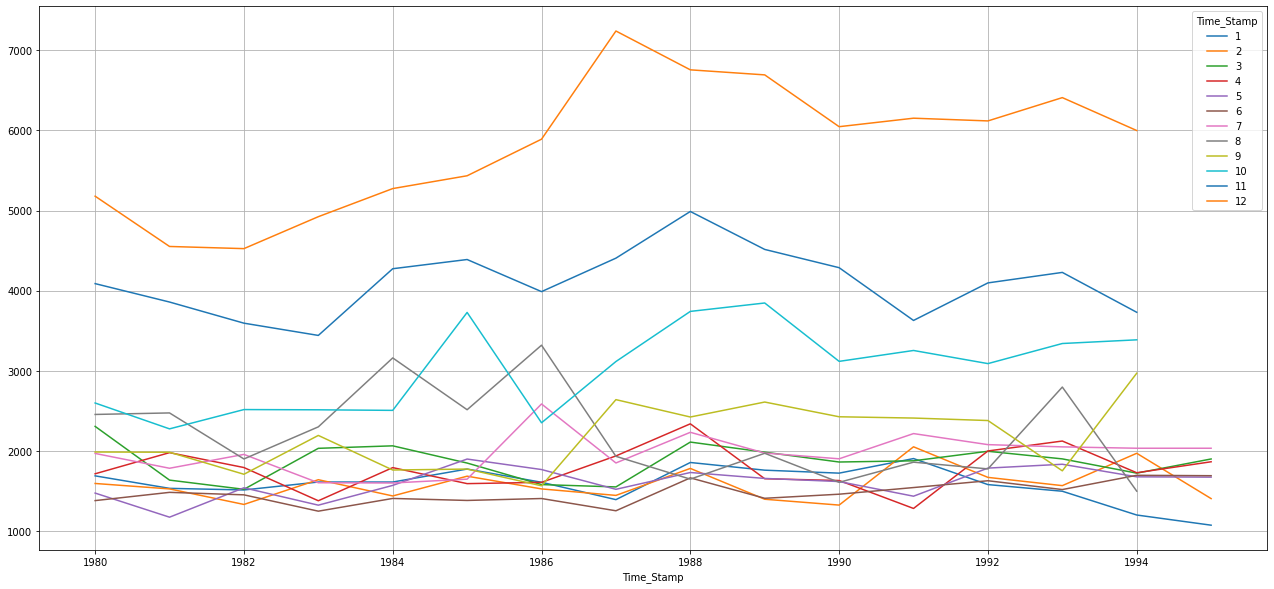

In [ ]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

###Here also I can see that irrespective of years in the month December the sales for Sparkling wine is the highest. 

In [ ]:
#Yearly Plot
#Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

df_yearly_sum = Sparkling_Data.resample('A').sum()
df_yearly_sum.head()

Sparkling
Time_Stamp           
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

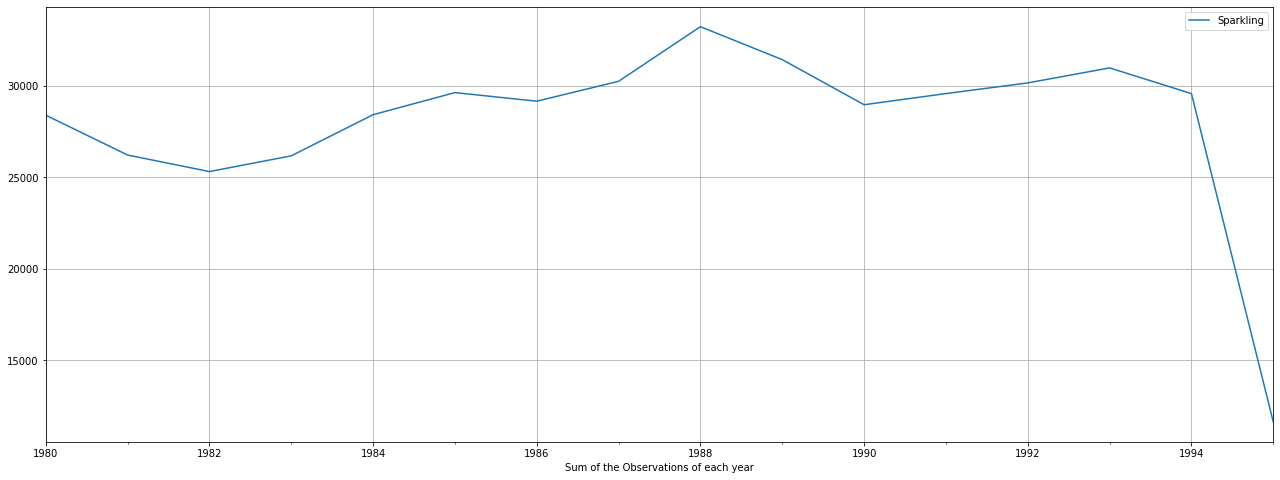

In [ ]:
df_yearly_sum.plot(figsize=(22,8));
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [ ]:
#Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation

df_yearly_mean = Sparkling_Data.resample('Y').mean()
df_yearly_mean.head()

Sparkling
Time_Stamp             
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

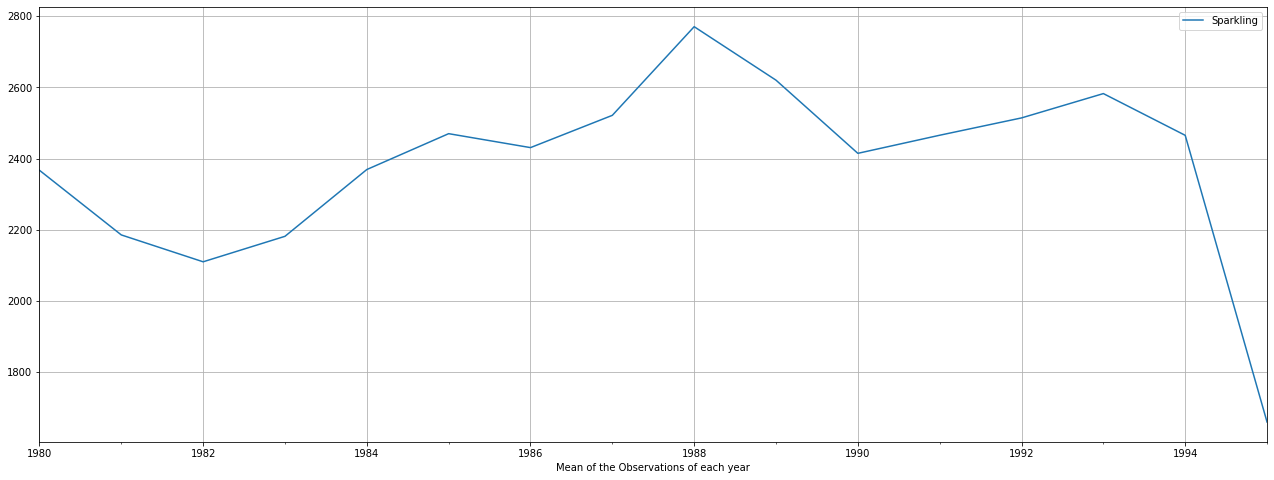

In [ ]:
df_yearly_mean.plot(figsize=(22,8));
plt.grid()
plt.xlabel('Mean of the Observations of each year');

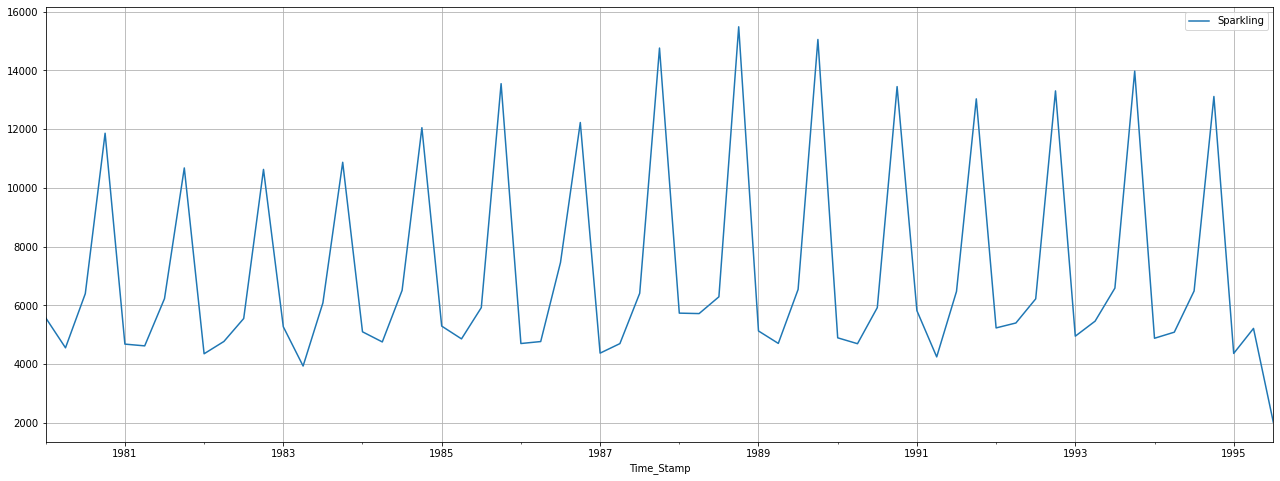

In [ ]:
#Quarterly Plot

df_quarterly_sum = Sparkling_Data.resample('Q').sum()
df_quarterly_sum.plot(figsize=(22,8));
plt.grid()

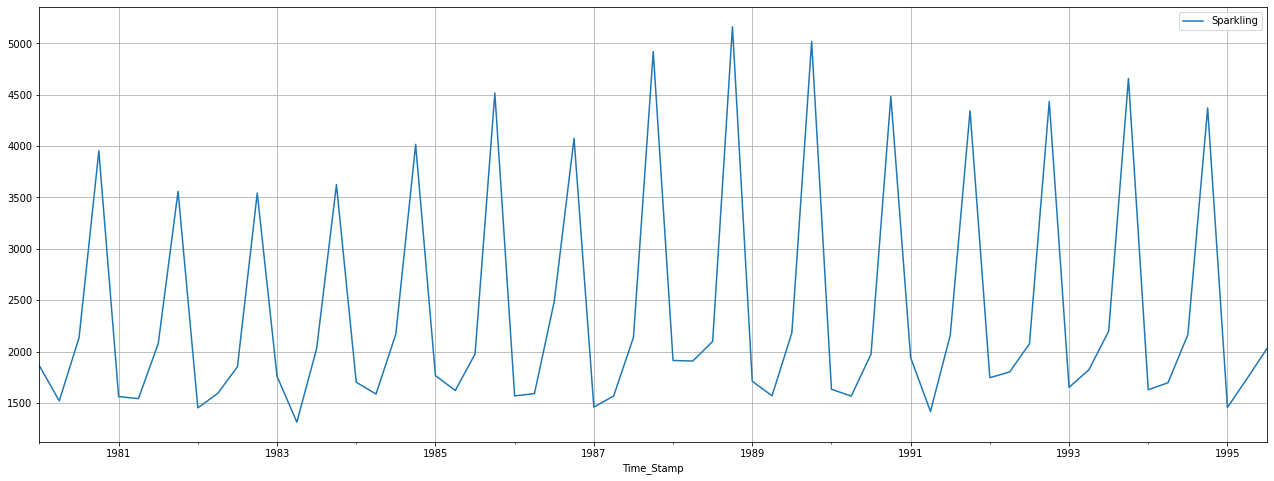

In [ ]:
df_quarterly_mean = Sparkling_Data.resample('Q').mean()
df_quarterly_mean.plot(figsize=(22,8));
plt.grid()

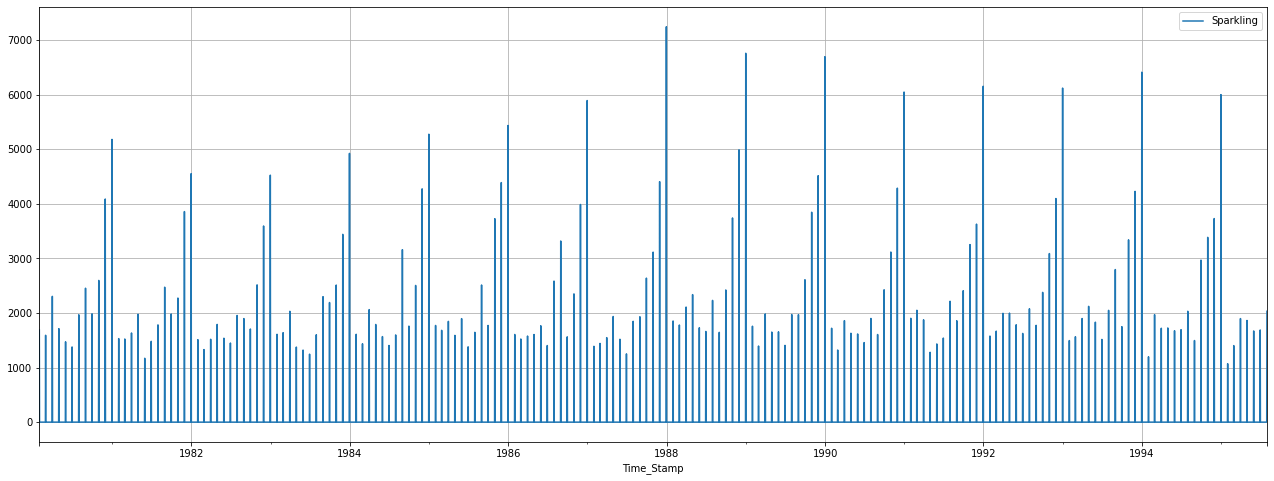

In [ ]:
#Daily Plot
#Let us try to understand the data from a daily perspective.

df_daily_sum = Sparkling_Data.resample('D').sum()
df_daily_sum.plot(figsize=(22,8))
plt.grid();


###While from the above plot the analysis is not much clear let’s plot the time series on decade perspective.

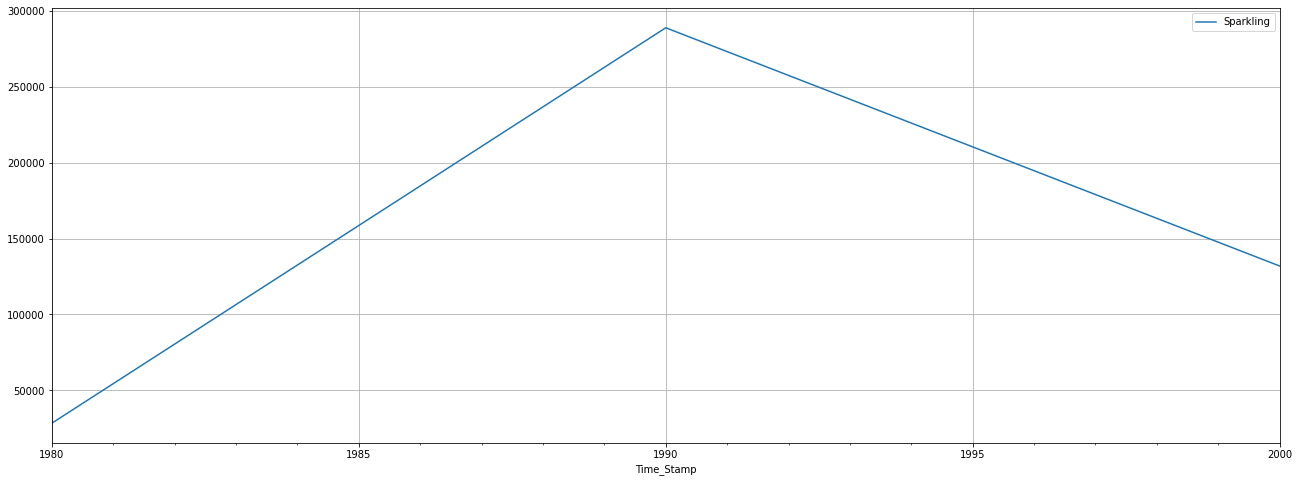

In [ ]:
#Decade Plot

df_decade_sum = Sparkling_Data.resample('10Y').sum()
df_decade_sum.plot(figsize=(22,8));
plt.grid();

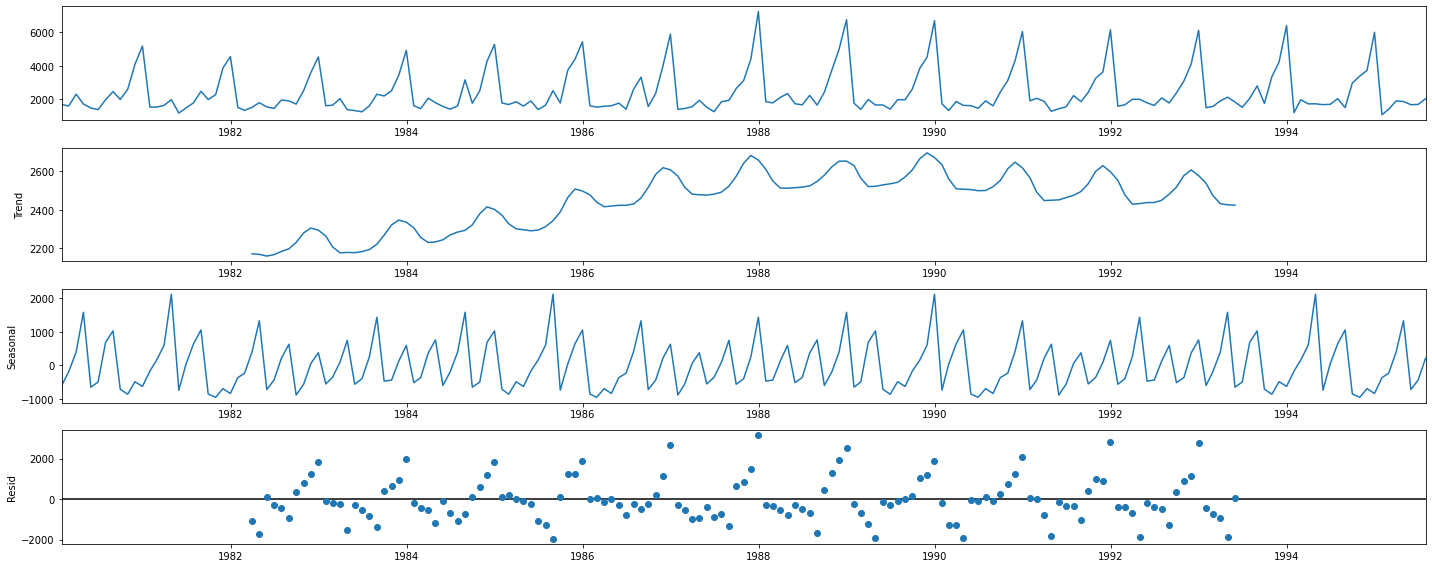

In [ ]:
#Decomposing the Data

Sparkling_Data.interpolate(inplace=True)
res=sm.tsa.seasonal_decompose(Sparkling_Data,freq=52)
resplot=res.plot()

###Additive

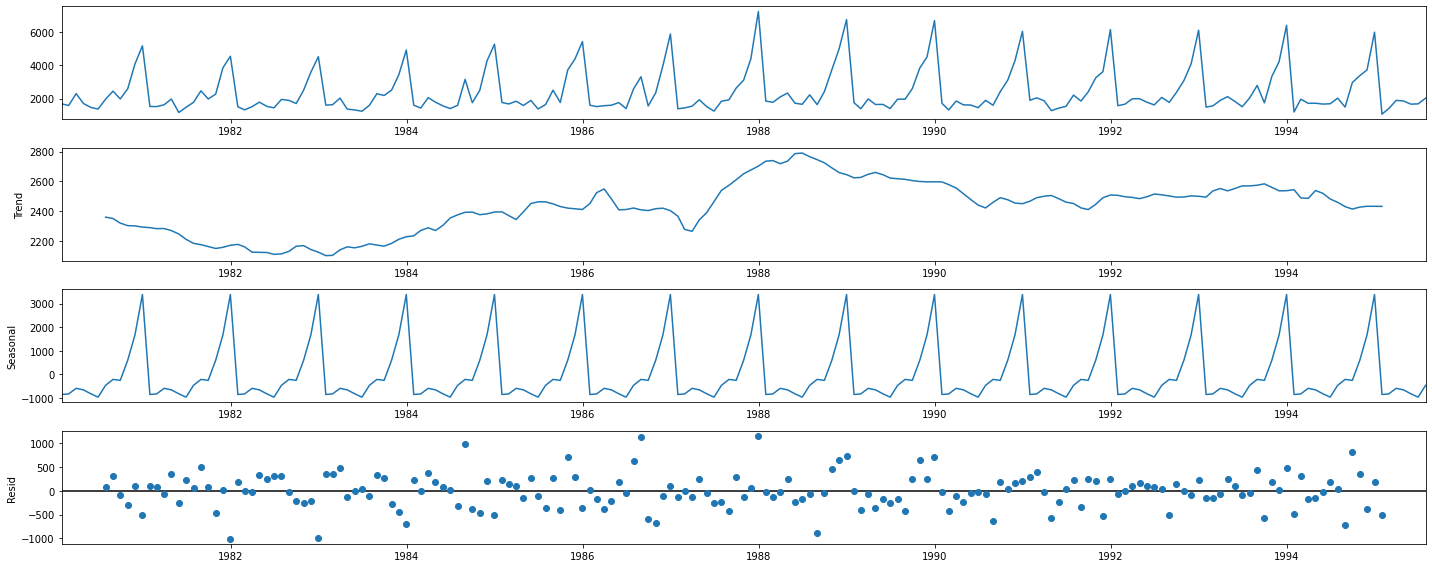

In [ ]:
decomposition = seasonal_decompose(Sparkling_Data,model='additive')
decomposition.plot();

###As per the 'additive' decomposition, we see that there is a trend in the  years of the data. There is a seasonality as well.

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [ ]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [ ]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2431.502265
1980-08-31    2667.332821
1980-09-30    2238.677265
1980-10-31    1996.230043
1980-11-30    2411.932821
1980-12-31    1792.016154
dtype: float64

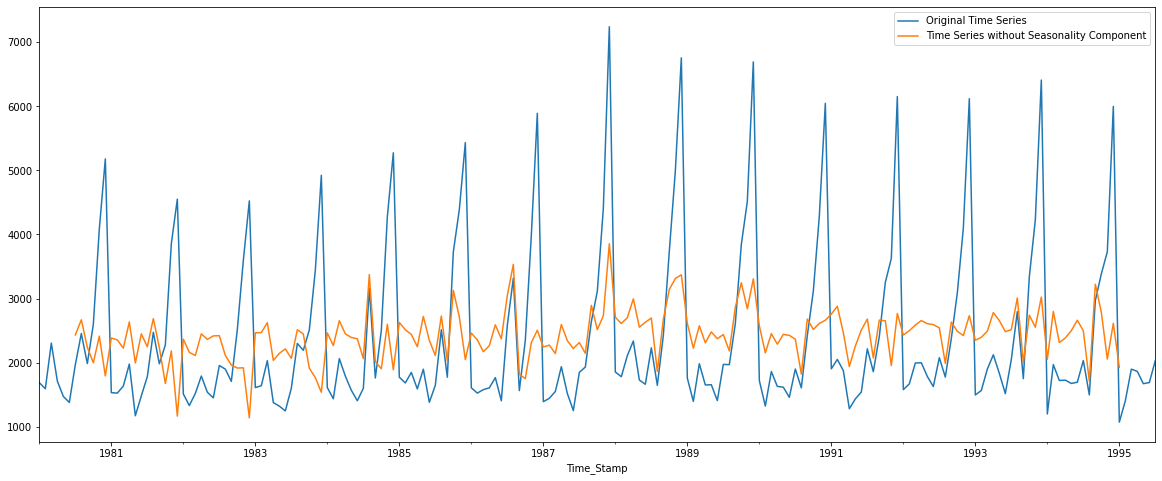

In [ ]:
Sparkling_Data.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", 
            "Time Series without Seasonality Component"]);

###Multiplicative

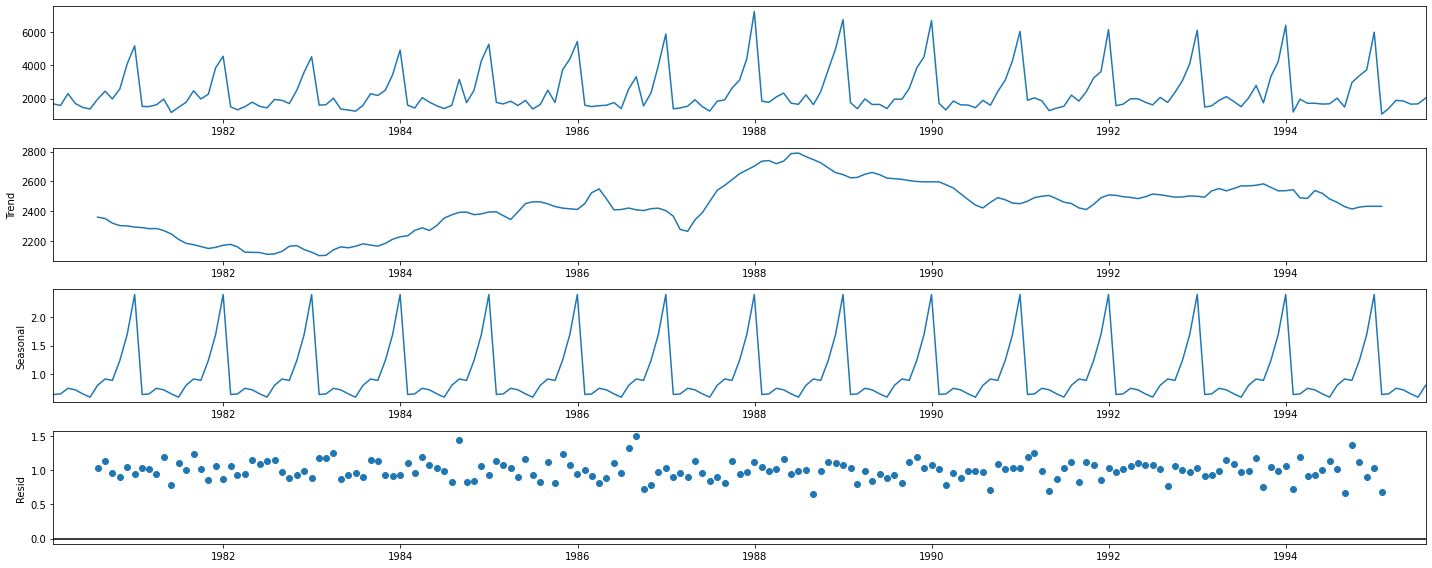

In [ ]:
Decomposition = seasonal_decompose(Sparkling_Data,model='multiplicative')
Decomposition.plot();

###For the multiplicative series, I can see that a lot of residuals are located around 1.

In [ ]:
trend = Decomposition.trend
seasonality = Decomposition.seasonal
residual = Decomposition.resid

In [ ]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [ ]:
Deaseasonalized_ts = trend + residual
Deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2361.695896
1980-08-31    2352.468741
1980-09-30    2321.497620
1980-10-31    2304.490847
1980-11-30    2303.092089
1980-12-31    2294.738436
dtype: float64

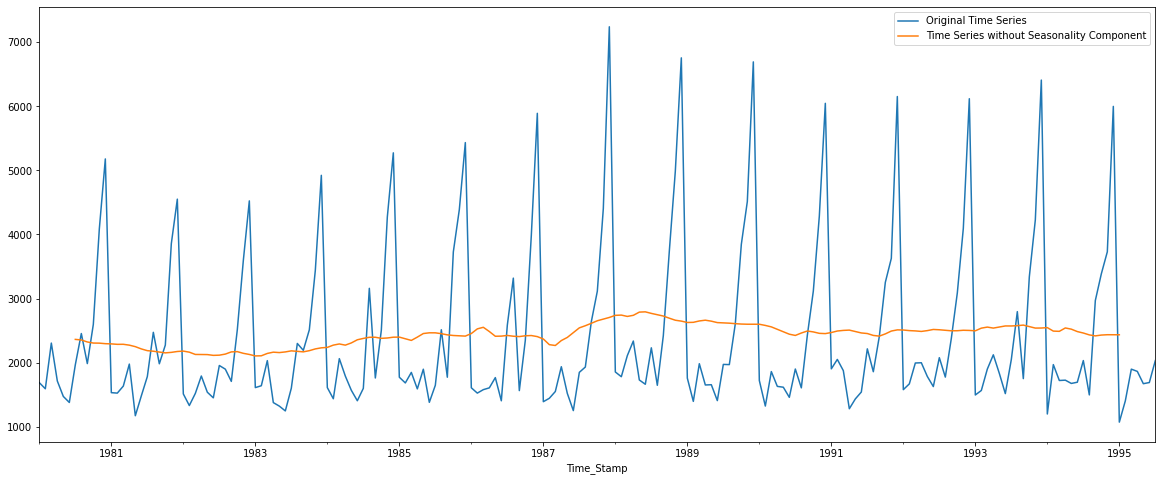

In [ ]:
Sparkling_Data.plot()
Deaseasonalized_ts.plot()
plt.legend(["Original Time Series", 
            "Time Series without Seasonality Component"]);

##Ans 3

In [9]:
train=Sparkling_Data[Sparkling_Data.index.year < 1991]
test=Sparkling_Data[Sparkling_Data.index.year >= 1991]

In [10]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


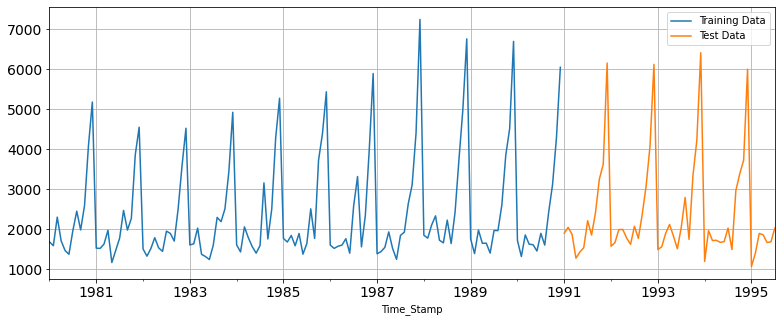

In [11]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show();

###As per the query I can see here the test data is starting from 1991

##Ans 4

###Model 1 - Linear Regression

In [12]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


###I can see that I have successfully the generated the numerical time instance order for both the training and test set. Now I will add these values in the training and test set.

In [13]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [14]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



In [15]:
lr = LinearRegression()

In [16]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

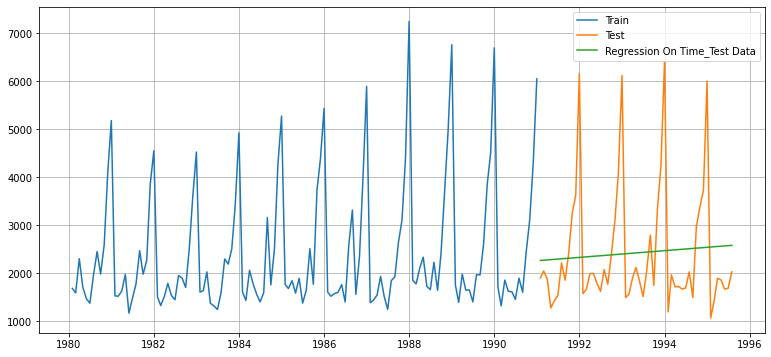

In [17]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [18]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


In [19]:
ResultsDF = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
ResultsDF

RMSE
RegressionOnTime  1275.867052

###Model 2 - Naive Approach

In [20]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [21]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['Sparkling'].head()

Time_Stamp
1991-01-31    1902
1991-02-28    2049
1991-03-31    1874
1991-04-30    1279
1991-05-31    1432
Name: Sparkling, dtype: int64

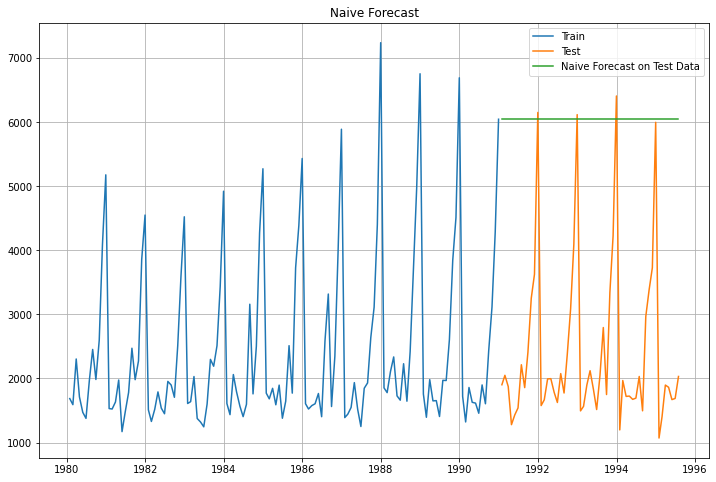

In [22]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [23]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [24]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])

ResultsDF = pd.concat([ResultsDF, resultsDf_2])
ResultsDF

RMSE
RegressionOnTime  1275.867052
NaiveModel        3864.279352

###Model 3 - Simple Average

In [25]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

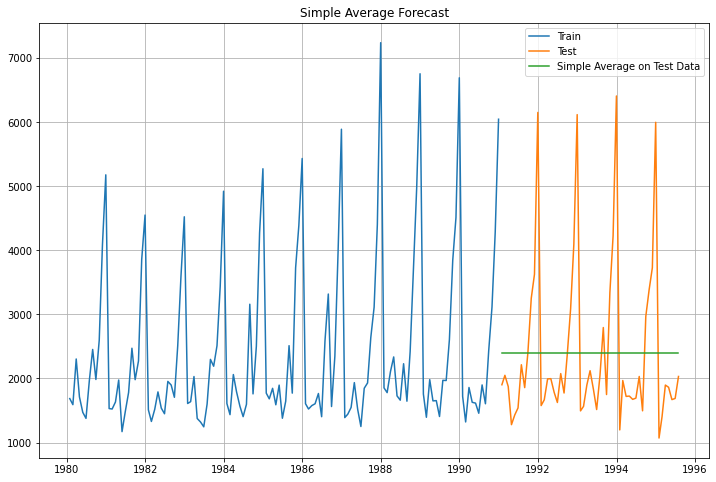

In [26]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()

plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [27]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [28]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

ResultsDF = pd.concat([ResultsDF, resultsDf_3])
ResultsDF

RMSE
RegressionOnTime    1275.867052
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

###Model 4 - Moving Average

In [29]:
MovingAverage = Sparkling_Data.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [30]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

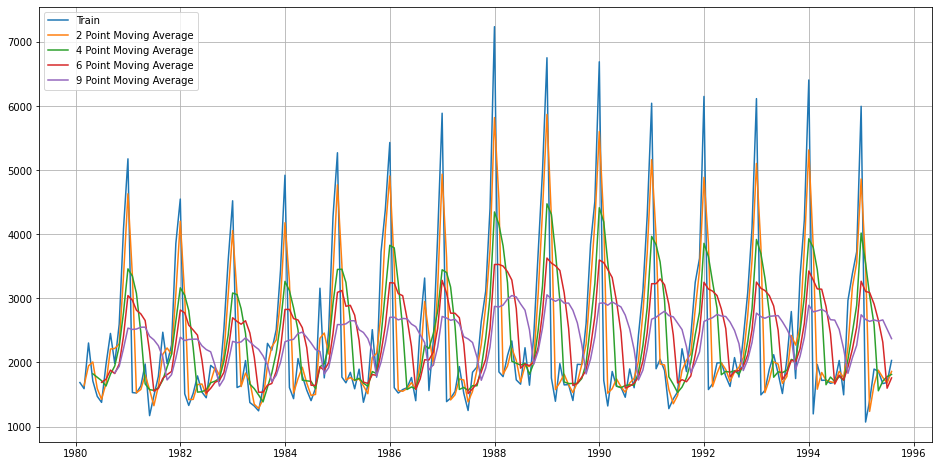

In [31]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

###Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [32]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

In [33]:
trailing_MovingAverage_test.head()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Stamp                                                             
1991-01-31       1902      3974.5     3837.75  3230.000000  2705.666667
1991-02-28       2049      1975.5     3571.00  3304.000000  2753.888889
1991-03-31       1874      1961.5     2968.00  3212.333333  2800.222222
1991-04-30       1279      1576.5     1776.00  2906.166667  2731.333333
1991-05-31       1432      1355.5     1658.50  2430.500000  2712.111111

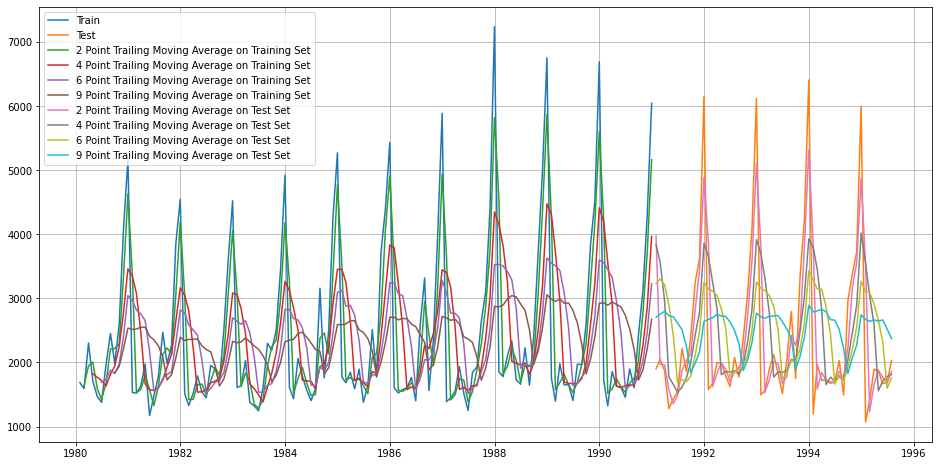

In [34]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [35]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))


rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))


rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [36]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

ResultsDF = pd.concat([ResultsDF, resultsDf_4])
ResultsDF

RMSE
RegressionOnTime             1275.867052
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

###Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

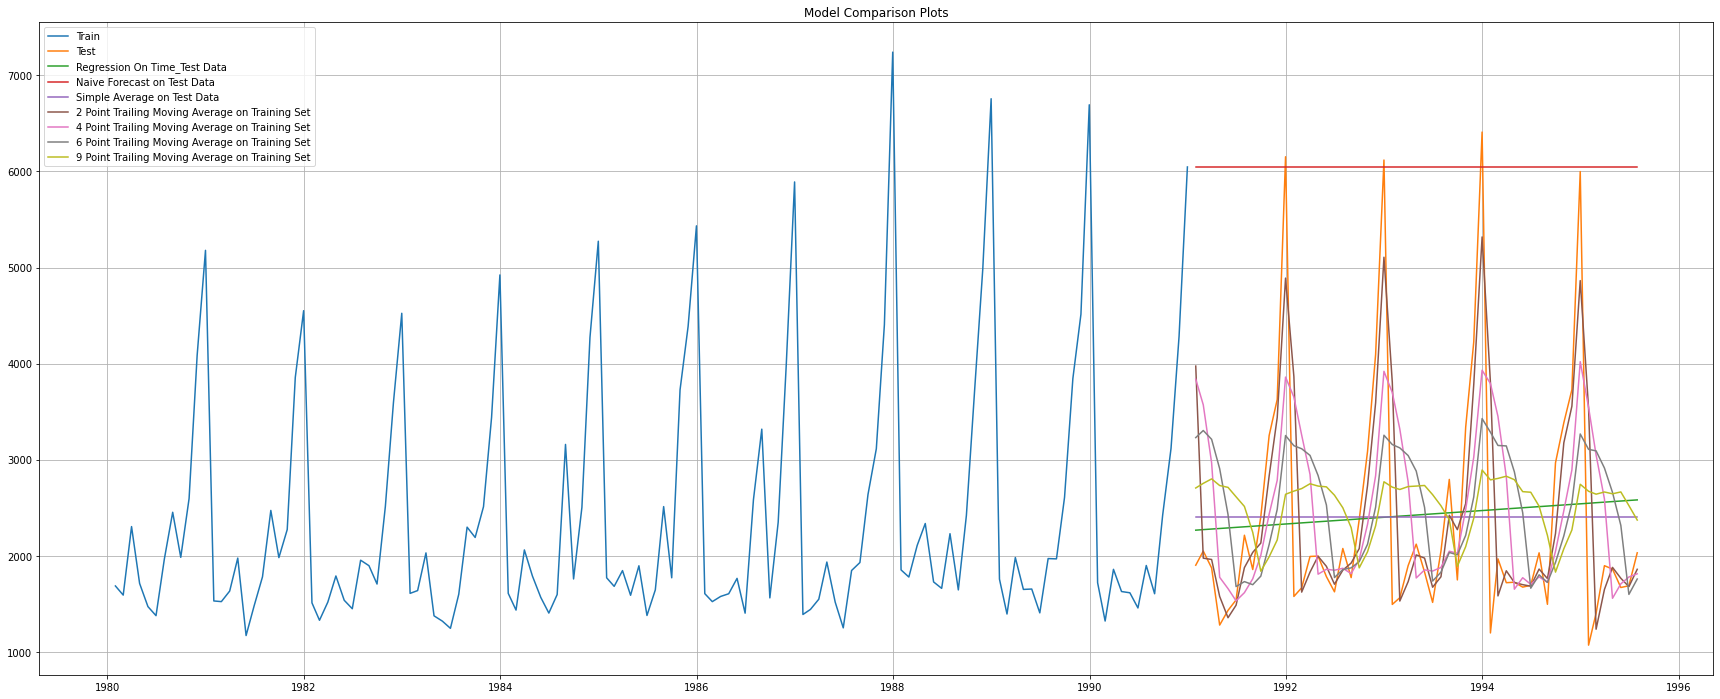

In [37]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_9'], label='9 Point Trailing Moving Average on Training Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

###Exponential Smoothing Methods
###Model 5 - Simple Exponential Smoothing

In [38]:
SES_train = train.copy()
SES_test = test.copy()

In [39]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [40]:
model_SES_autofit = model_SES.fit(optimized=True)

In [41]:
model_SES_autofit.params

{'smoothing_level': 0.04960659880745982,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435374,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [42]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2724.929339
1991-02-28       2049  2724.929339
1991-03-31       1874  2724.929339
1991-04-30       1279  2724.929339
1991-05-31       1432  2724.929339

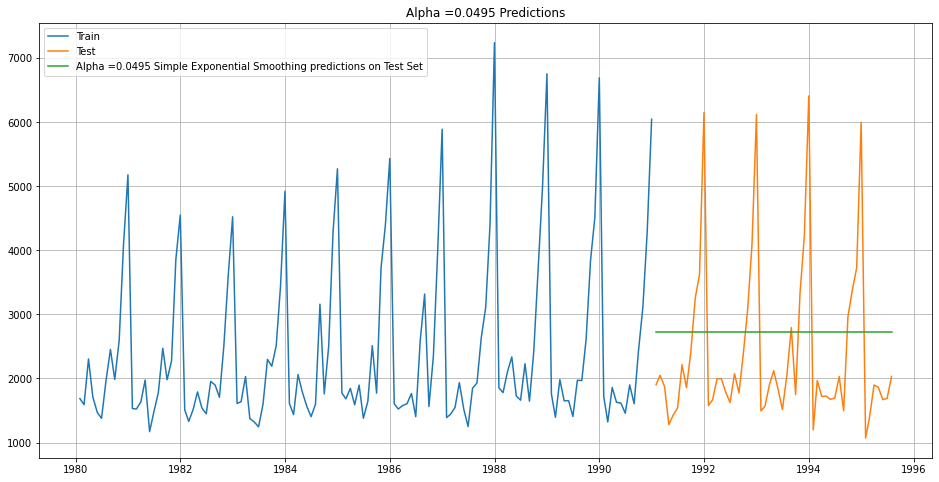

In [43]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0495 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0495 Predictions');

In [44]:
##Model Evaluation for α = 0.0495 : Simple Exponential Smoothing
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.0495 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.0495 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [45]:
resultsDf_5 = pd.DataFrame({'RMSE': [rmse_model5_test_1]},index=['Alpha=0.0495,SimpleExponentialSmoothing'])

ResultsDF = pd.concat([ResultsDF, resultsDf_5])
ResultsDF

RMSE
RegressionOnTime                         1275.867052
NaiveModel                               3864.279352
SimpleAverageModel                       1275.081804
2pointTrailingMovingAverage               813.400684
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
9pointTrailingMovingAverage              1346.278315
Alpha=0.0495,SimpleExponentialSmoothing  1316.034674

###Model 6 - Double Exponential Smoothing

In [46]:
DES_train = train.copy()
DES_test = test.copy()

In [47]:
model_DES = Holt(DES_train['Sparkling'])

In [48]:
rmse_model6 = pd.DataFrame({'Alpha':[],'Beta':[],
                            'RMSE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_sparkling_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_test['predict',i,j] = model_DES_sparkling_alpha_i_j.forecast(len(test['Sparkling']))
                
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        rmse_model6 = rmse_model6.append({'Alpha':i,'Beta':j,'RMSE':rmse_model6_test}, ignore_index=True)

In [49]:
rmse_model6.sort_values(by=['RMSE']).head()

Alpha  Beta         RMSE
0     0.1   0.1  1779.424851
1     0.1   0.2  2601.542607
10    0.2   0.1  3611.765464
2     0.1   0.3  4288.433299
20    0.3   0.1  5908.185554

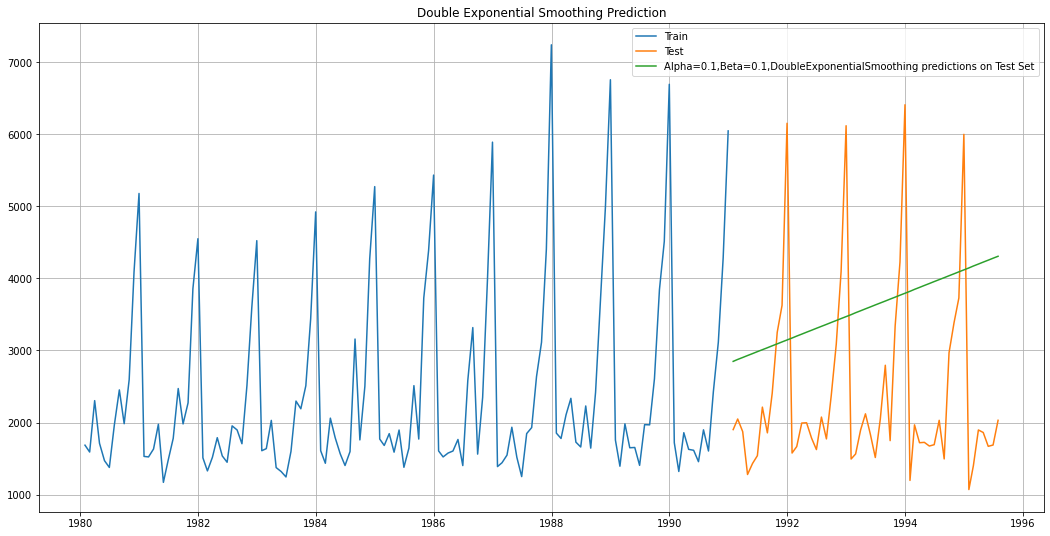

In [50]:
# Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();
plt.title('Double Exponential Smoothing Prediction');

In [51]:
resultsDf_6 = pd.DataFrame({'RMSE': [rmse_model6.sort_values(by=['RMSE']).values[0][2]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])
resultsDf_6

RMSE
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1779.424851

In [52]:
ResultsDF = pd.concat([ResultsDF, resultsDf_6])
ResultsDF

RMSE
RegressionOnTime                               1275.867052
NaiveModel                                     3864.279352
SimpleAverageModel                             1275.081804
2pointTrailingMovingAverage                     813.400684
4pointTrailingMovingAverage                    1156.589694
6pointTrailingMovingAverage                    1283.927428
9pointTrailingMovingAverage                    1346.278315
Alpha=0.0495,SimpleExponentialSmoothing        1316.034674
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1779.424851

###Model 7 - Triple Exponential Smoothing

In [53]:
TES_train = train.copy()
TES_test = test.copy()

In [54]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [55]:
# Fitting the model
model_TES_autofit = model_TES.fit(optimized=True)

model_TES_autofit.params

{'smoothing_level': 0.11107308290744182,
 'smoothing_trend': 0.06167745801641925,
 'smoothing_seasonal': 0.39488777704116057,
 'damping_trend': nan,
 'initial_level': 1639.5306320456996,
 'initial_trend': -13.803739314239138,
 'initial_seasons': array([1.04411064, 1.00095858, 1.40459398, 1.20906039, 0.96413947,
        0.96754964, 1.3048211 , 1.69841076, 1.37034155, 1.81659752,
        2.84708154, 3.62462473]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [56]:
# Forecasting using this model for the duration of the test set
TES_test['predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  1577.287560
1991-02-28       2049  1333.740806
1991-03-31       1874  1746.024831
1991-04-30       1279  1630.595491
1991-05-31       1432  1523.372422

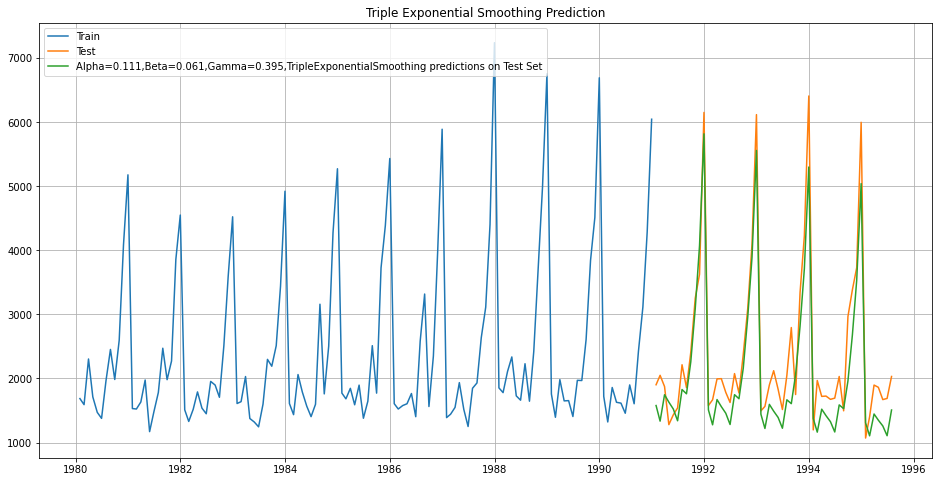

In [57]:
# Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(16,8))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')


plt.plot(TES_test['predict'], label='Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Prediction');

In [58]:
##Model Evaluation : Triple Exponential Smoothing
## Test Data

rmse_model7= metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict'],squared=False)
print("For Alpha=0.111,Beta=0.061,Gamma=0.395 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7))

For Alpha=0.111,Beta=0.061,Gamma=0.395 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 469.432


In [59]:
rmse_model7 = pd.DataFrame({'RMSE': [rmse_model7]},index=['Alpha=0.111,Beta=0.061,Gamma=0.395 Triple Exponential Smoothing'])

ResultsDF = pd.concat([ResultsDF, rmse_model7])
ResultsDF

RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0495,SimpleExponentialSmoothing             1316.034674
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424851
Alpha=0.111,Beta=0.061,Gamma=0.395 Triple Expon...   469.432003

##Ans 5

In [60]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

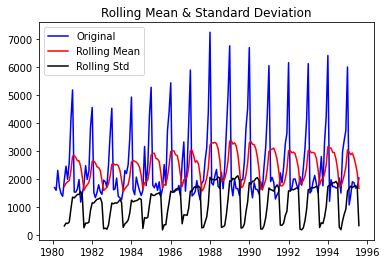

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [61]:
test_stationarity(Sparkling_Data['Sparkling'])

###I can see that at 5% significant level the Time Series is non-stationary. Here the p value is greater than 0.05 so the time series is non-stationary.

###Let me take a difference of order 1 and check whether the Time Series is stationary or not.

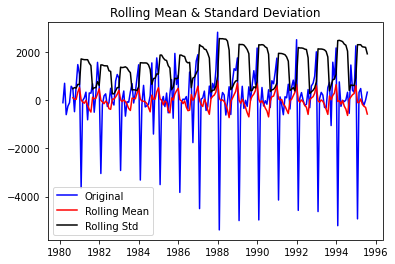

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [62]:
test_stationarity(Sparkling_Data['Sparkling'].diff().dropna())

###Now I can see the p value is less than 0.05 it means after taking difference order 1 the time series has become Stationary.


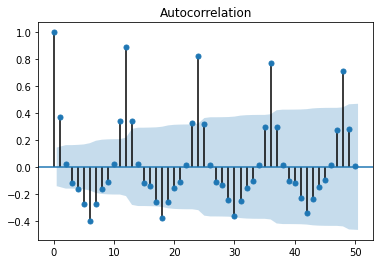

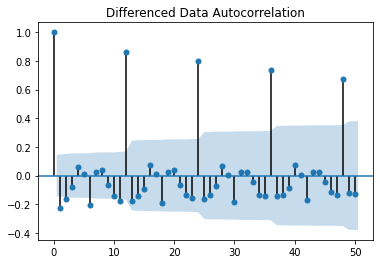

In [63]:
###Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

plot_acf(Sparkling_Data['Sparkling'],lags=50)
plot_acf(Sparkling_Data['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

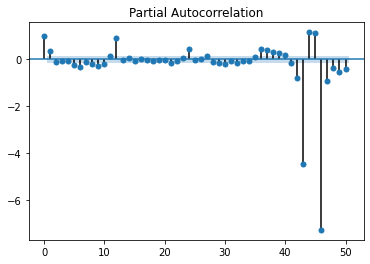

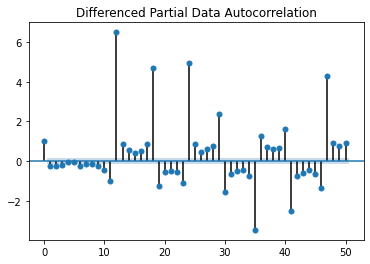

In [64]:
plot_pacf(Sparkling_Data['Sparkling'],lags=50)
plot_pacf(Sparkling_Data['Sparkling'].diff().dropna(),lags=50,title='Differenced Partial Data Autocorrelation')
plt.show();

###From the above plots, we can say that there seems to be a seasonality in the data.

##Ans 6

###ARIMA Model

###Model 8 - Auto ARIMA Model

In [65]:
## The following loop helps me in getting a combination of different parameters of p and q in the range of 0 and 2
## I have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [66]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [67]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064376843794
ARIMA(0, 1, 2) - AIC:2232.783097684644
ARIMA(1, 1, 0) - AIC:2268.528060727385
ARIMA(1, 1, 1) - AIC:2235.0139453491897
ARIMA(1, 1, 2) - AIC:2233.5976471189088
ARIMA(2, 1, 0) - AIC:2262.0356004050427
ARIMA(2, 1, 1) - AIC:2232.360489897974
ARIMA(2, 1, 2) - AIC:2210.6272549347427


In [68]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.627255
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906438
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

###Here I can see that the AIC value is lowest for the order combination (2,1,2) so now I will make ARIMA model with this order. As we all know that the lower the AIC value the better the model.

In [69]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.314
Method:                       css-mle   S.D. of innovations           1013.915
Date:                Thu, 22 Dec 2022   AIC                           2210.627
Time:                        10:51:24   BIC                           2227.878
Sample:                    02-29-1980   HQIC                          2217.637
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5882      0.517     10.808      0.000       4.575       6.602
ar.L1.D.Sparkling     1.2696      0.075     17.035      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

###The above model is an AutoRegressive Integrated Moving Average model of order (2,1,2) i.e. the Time Series being regressed upon itself at a lag of 2, the errors from a lag of 2 and a lag and a degree or order differencing of 1 to make it stationary.

In [70]:
###Predict on the Test Set using this model and evaluate the model.

predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [71]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.1183262069978


In [72]:
resultsDF = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDF

RMSE
ARIMA(2,1,2)  1374.118326

###Model 9 - Auto SARIMA Model

###Creating SARIMA model with seasonality at 12 as I have got from the ACF plot

In [73]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [74]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [75]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846088
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640239793
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388806
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735792028
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158609594
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920774
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566503
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573596925
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183827
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193755366
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144546253
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195417545
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245094167754
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.401883400661
SARIMA(0, 1, 2

In [76]:
SARIMA_AIC.sort_values(by='AIC',ascending=True).head(10)

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121569
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340403
80  (2, 1, 2)  (2, 0, 2, 12)  1557.689334
14  (0, 1, 1)  (1, 0, 2, 12)  1570.150914
17  (0, 1, 1)  (2, 0, 2, 12)  1570.401883
41  (1, 1, 1)  (1, 0, 2, 12)  1571.324886
44  (1, 1, 1)  (2, 0, 2, 12)  1571.806997

###Here I can see for the combination of (1,1,2) (1,0,2,12) the AIC value is the lowest so I have built SARIMA model with this combination.

In [77]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Thu, 22 Dec 2022   AIC                           1555.584
Time:                                    10:52:46   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

In [78]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [79]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6302377417713


In [80]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDF = pd.concat([resultsDF,temp_resultsDf])

resultsDF

RMSE
ARIMA(2,1,2)             1374.118326
SARIMA(1,1,2)(1,0,2,12)   528.630238

##Ans 7

###Model 10 - Manual ARIMA Model

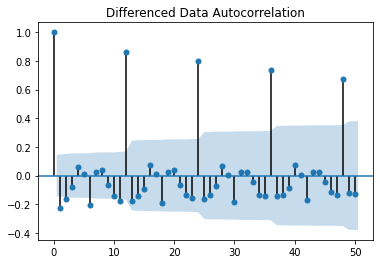

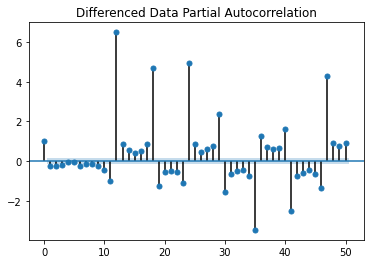

In [81]:
plot_acf(Sparkling_Data['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(Sparkling_Data['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [82]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Thu, 22 Dec 2022   AIC                           2269.583
Time:                        10:53:05   BIC                           2275.333
Sample:                    02-29-1980   HQIC                          2271.919
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.782    -202.667     269.248


In [83]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [84]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

4779.15429919654


In [85]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDF = pd.concat([resultsDF,temp_resultsDf])

resultsDF

RMSE
ARIMA(2,1,2)             1374.118326
SARIMA(1,1,2)(1,0,2,12)   528.630238
ARIMA(0,1,0)             4779.154299

###Model 11 - Manual SARIMA Model

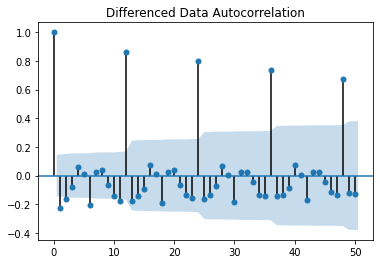

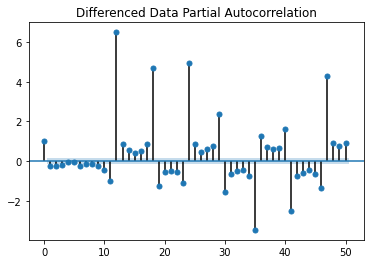

In [86]:
plot_acf(Sparkling_Data['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(Sparkling_Data['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

###I can see that ACF plot at the seasonal interval (12) does not taper off. So, I will go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

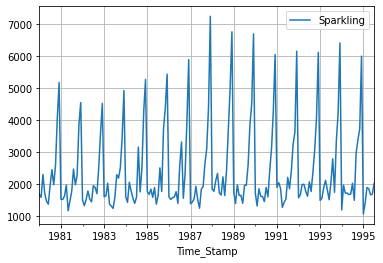

In [87]:
Sparkling_Data.plot()
plt.grid();

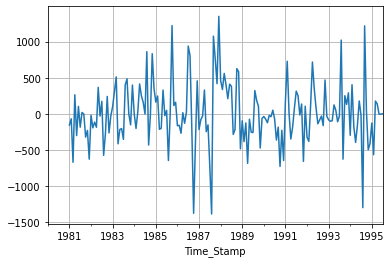

In [88]:
(Sparkling_Data['Sparkling'].diff(12)).plot()
plt.grid();

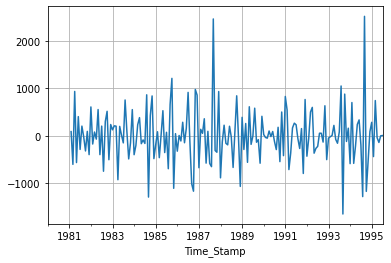

In [89]:
(Sparkling_Data['Sparkling'].diff(12)).diff().plot()
plt.grid();

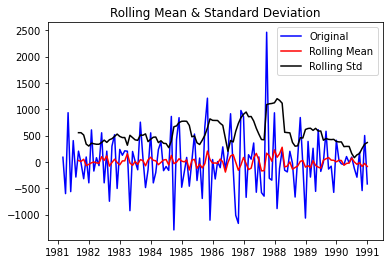

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [90]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

###Now the train set is stationary as I can see p-value is less than alpha value 0.05.

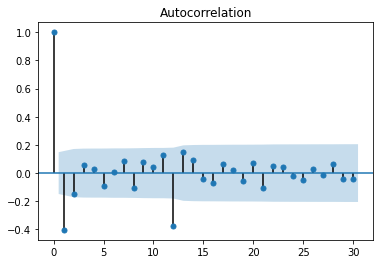

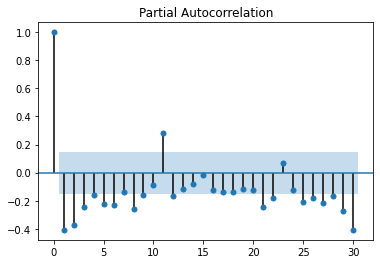

In [91]:
#Checking the ACF and the PACF plots for the new modified Time Series.

plot_acf((Sparkling_Data['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((Sparkling_Data['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

###Let me build SARIMA model from the parameters of ACF and PACF plots.
###Here, I have taken alpha=0.05.
###I am going to take the seasonal period as 12 or its multiple e.g. 24. I am taking the p value to be 0 and the q value also to be 0 as the parameters same as the ARIMA model. The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
###The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.

In [92]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -723.264
Date:                                 Thu, 22 Dec 2022   AIC                           1454.529
Time:                                         10:53:51   BIC                           1464.702
Sample:                                     01-31-1980   HQIC                          1458.638
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1627      1.622     -0.100      0.920      -3.343       3

In [93]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [94]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
print(rmse)

1366.384997017272


In [95]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,2,12)'])


resultsDF = pd.concat([resultsDF,temp_resultsDf])

resultsDF

RMSE
ARIMA(2,1,2)             1374.118326
SARIMA(1,1,2)(1,0,2,12)   528.630238
ARIMA(0,1,0)             4779.154299
SARIMA(0,1,0)(1,1,2,12)  1366.384997

###I can see that there are differences in the RMSE values among all the models but for SARIMA models there is huge difference when I am building the model on the basis of ACF and PACF plots.

##Ans 8

###Lets make a table of all RMSE values for all the models I have built earlier and all the ARIMA/SARIMA models.

In [96]:
resultsDF = pd.concat([resultsDF,ResultsDF])

resultsDF

RMSE
ARIMA(2,1,2)                                        1374.118326
SARIMA(1,1,2)(1,0,2,12)                              528.630238
ARIMA(0,1,0)                                        4779.154299
SARIMA(0,1,0)(1,1,2,12)                             1366.384997
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0495,SimpleExponentialSmoothing             1316.034674
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424851
Alpha=0.111,Beta=0.061,Gamma=0.395 Triple Expon...   469.432003

###Among the models I can see RMSE value for Alpha = 0.111, Beta = 0.061, Gamma= 0.395 Triple Exponential Smoothing model is the lowest. But for better result I will perform SARIMA model with SARIMA (1,1,2) (1,0,2,12) model on the full data to predict a certain 12 months in future.

##Ans 9

In [97]:
full_data_model = sm.tsa.statespace.SARIMAX(Sparkling_Data['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Thu, 22 Dec 2022   AIC                           2360.826
Time:                                    10:54:09   BIC                           2382.308
Sample:                                01-31-1980   HQIC                          2369.549
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6611      0.242     -2.734      0.006      -1.135      -0.187
ma.L1         -0.1801      0.219   

In [98]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [99]:
rmse = mean_squared_error(Sparkling_Data['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 539.924760532969


In [100]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1836.351902  379.705996    1092.141824    2580.561979
1995-09-30  2489.612993  384.468802    1736.067988    3243.157998
1995-10-31  3324.578593  384.574477    2570.826470    4078.330716
1995-11-30  4020.219533  386.332898    3263.020966    4777.418099
1995-12-31  6289.965046  386.387457    5532.659545    7047.270546

In [101]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1998-01-01',end='1998-12-31', freq='M'))

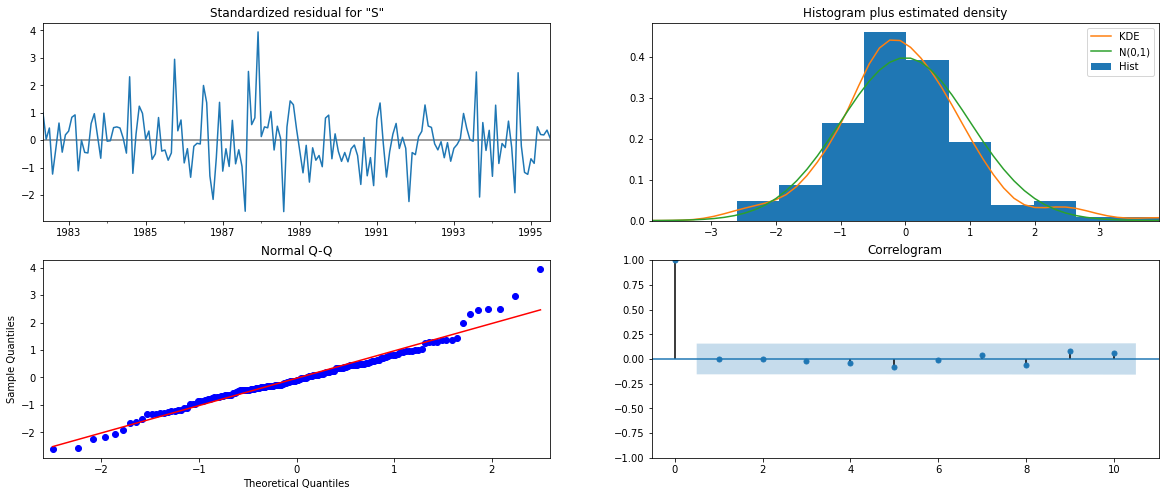

In [103]:
plt.rcParams['figure.figsize'] = [20, 8]
results_full_data_model.plot_diagnostics();

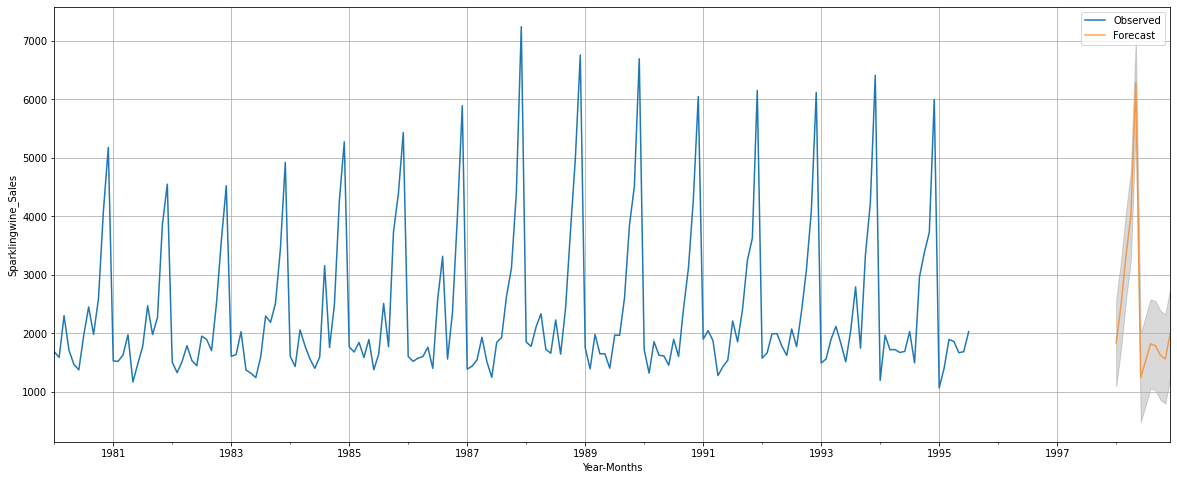

In [104]:
axis = Sparkling_Data['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparklingwine_Sales')
plt.legend(loc='best')
plt.grid();

###Here with the time series data of previous years I have predicted the sales for Sparkling wine in the year of 1998. Here I have taken the model of SARIMA with order (1,1,2) (1,0,2,12)


##Ans 10

###For the Sparkling wine if I see the trend of sales from year 1980 to July,1995 then there has not been any significant change in the trend. It has not either increased or decreased much. The rate of sales in those years had been steady. Using this trend, I have predicted the sales for the year 1998 and I have found there might be little increase in their sales comparing to 1995 but that is not remarkable gain. So if ABC Estate Wines wants to make some remarkable gain in the sales of Sparkling wine then they have to look upon that.
###From the plots I can see in the month December irrespective of all the years there has been remarkable sales with respect to other months. May be it is for the festive season. Winter season, Christmas Eve, Pre New Year eve these factors have been impacted on the sales.
###But to improve the company has to come out with different ideas. We can not introduce new festivals in the calendar but the company may introduce new offers for the wine in the rest of the months. New offers for new customers, different offers for old loyal customers so that they become interested to buy Sparkling wine from the company. They can introduce different varieties but all will be in the Sparkling wine.

